In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https://dlcdn.apache.org/spark/spark-3.3.0/spark-3.3.0-bin-hadoop3.tgz


In [ ]:
!tar xf spark-3.3.0-bin-hadoop3.tgz


In [ ]:
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.0-bin-hadoop3"

In [ ]:
import findspark
findspark.init()

In [ ]:
findspark.find()

'/content/spark-3.3.0-bin-hadoop3'

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local").appName("abc").config('spark.ui.port', '4050').getOrCreate()

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 46 kB/s 
     |████████████████████████████████| 199 kB 64.1 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=09fd0c9a3b939356109fbe06e43cae94985d503e6e0931c3cb5c40c04091c2ce
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [ ]:
spark

In [ ]:
import pandas as pd
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('sample').getOrCreate()
df=spark.createDataFrame(data=[(1,2,3),(4,5,6),(3,2,1)\
                              ,(6,1,-4),(0,2,-2),(6,4,1)\
                              ,(4,5,2),(5,-3,-5),(6,4,-1)]\
                              ,schema=['x1','x2','x3'])
df.printSchema()



root
 |-- x1: long (nullable = true)
 |-- x2: long (nullable = true)
 |-- x3: long (nullable = true)



In [ ]:
df.show()

+---+---+---+
| x1| x2| x3|
+---+---+---+
|  1|  2|  3|
|  4|  5|  6|
|  3|  2|  1|
|  6|  1| -4|
|  0|  2| -2|
|  6|  4|  1|
|  4|  5|  2|
|  5| -3| -5|
|  6|  4| -1|
+---+---+---+



In [ ]:
import pandas as pd    
data = [['Scott', 50], ['Jeff', 45], ['Thomas', 54],['Ann',34]] 
  
# Create the pandas DataFrame 
pandasDF = pd.DataFrame(data, columns = ['Name', 'Age']) 
  
# print dataframe. 
print(pandasDF)

     Name  Age
0   Scott   50
1    Jeff   45
2  Thomas   54
3     Ann   34


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[1]").appName("I1").getOrCreate()

sparkDF=spark.createDataFrame(pandasDF) 
sparkDF.printSchema()
sparkDF.show()

root
 |-- Name: string (nullable = true)
 |-- Age: long (nullable = true)

+------+---+
|  Name|Age|
+------+---+
| Scott| 50|
|  Jeff| 45|
|Thomas| 54|
|   Ann| 34|
+------+---+



In [ ]:
from pyspark.sql.types import StructType,StructField, StringType, IntegerType
mySchema = StructType([ StructField("First Name", StringType(), True)\
                       ,StructField("Age", IntegerType(), True)])

sparkDF2 = spark.createDataFrame(pandasDF,schema=mySchema)
sparkDF2.printSchema()
sparkDF2.show()

root
 |-- First Name: string (nullable = true)
 |-- Age: integer (nullable = true)

+----------+---+
|First Name|Age|
+----------+---+
|     Scott| 50|
|      Jeff| 45|
|    Thomas| 54|
|       Ann| 34|
+----------+---+



In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('eybangalore').getOrCreate()

from pyspark.sql.functions import col,expr

data=[("2019-01-23",1),("2019-06-24",2),("2019-09-20",3)]

spark.createDataFrame(data).toDF("date","increment").select(col("date"),col("increment"),expr("add_months(to_date(date,'yyyy-MM-dd'),cast(increment as int))").alias("inc_date")) \
    .show()

+----------+---------+----------+
|      date|increment|  inc_date|
+----------+---------+----------+
|2019-01-23|        1|2019-02-23|
|2019-06-24|        2|2019-08-24|
|2019-09-20|        3|2019-12-20|
+----------+---------+----------+



In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('IBM3').getOrCreate()

from pyspark.sql.functions import col,expr

data=[("2019-01-23",1),("2019-06-24",2),("2019-09-20",3)]

spark.createDataFrame(data).toDF("date","increment").select(col("date"),col("increment"),expr("date_add(to_date(date,'yyyy-MM-dd'),increment)").alias("inc_date")) \
    .show()

AnalysisException: ignored

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('a').getOrCreate()

data = [('James','Smith','M',3000),
  ('Anna','Rose','F',4100),
  ('Robert','Williams','M',6200), 
]

columns = ["firstname","lastname","gender","salary"]
df = spark.createDataFrame(data=data, schema = columns)
df.show()

+---------+--------+------+------+
|firstname|lastname|gender|salary|
+---------+--------+------+------+
|    James|   Smith|     M|  3000|
|     Anna|    Rose|     F|  4100|
|   Robert|Williams|     M|  6200|
+---------+--------+------+------+



In [ ]:
if 'salary' not in df.columns:
    print("aa")

In [ ]:
from pyspark.sql.functions import lit
df.withColumn("bonus_percent", lit(0.5)).show()

+---------+--------+------+------+-------------+
|firstname|lastname|gender|salary|bonus_percent|
+---------+--------+------+------+-------------+
|    James|   Smith|     M|  3000|          0.5|
|     Anna|    Rose|     F|  4100|          0.5|
|   Robert|Williams|     M|  6200|          0.5|
+---------+--------+------+------+-------------+



In [ ]:
df.withColumn("bonus_amount", df.salary*10).show()

+---------+--------+------+------+------------+
|firstname|lastname|gender|salary|bonus_amount|
+---------+--------+------+------+------------+
|    James|   Smith|     M|  3000|       30000|
|     Anna|    Rose|     F|  4100|       41000|
|   Robert|Williams|     M|  6200|       62000|
+---------+--------+------+------+------------+



In [ ]:
from pyspark.sql.functions import concat_ws
a1=df.withColumn("name", concat_ws(":","firstname",'lastname'))
a1.show()


+---------+--------+------+------+---------------+
|firstname|lastname|gender|salary|           name|
+---------+--------+------+------+---------------+
|    James|   Smith|     M|  3000|    James:Smith|
|     Anna|    Rose|     F|  4100|      Anna:Rose|
|   Robert|Williams|     M|  6200|Robert:Williams|
+---------+--------+------+------+---------------+



In [ ]:
from pyspark.sql.functions import *
a1=df.withColumn("name", concat_ws(":","firstname",'lastname'))
a1.show()

+---------+--------+------+------+---------------+
|firstname|lastname|gender|salary|           name|
+---------+--------+------+------+---------------+
|    James|   Smith|     M|  3000|    James:Smith|
|     Anna|    Rose|     F|  4100|      Anna:Rose|
|   Robert|Williams|     M|  6200|Robert:Williams|
+---------+--------+------+------+---------------+



In [ ]:
from pyspark.sql.functions import current_date
df.withColumn("current_date", current_date()).show()

+---------+--------+------+------+------------+
|firstname|lastname|gender|salary|current_date|
+---------+--------+------+------+------------+
|    James|   Smith|     M|  3000|  2022-09-17|
|     Anna|    Rose|     F|  4100|  2022-09-17|
|   Robert|Williams|     M|  6200|  2022-09-17|
+---------+--------+------+------+------------+



In [ ]:
from pyspark.sql.functions import when
df.withColumn("grade", \
   when((df.salary < 4000), lit("A")) \
     .when((df.salary >= 4000) & (df.salary <= 5000), lit("B")) \
     .otherwise(lit("C")) \
  ).show()

+---------+--------+------+------+-----+
|firstname|lastname|gender|salary|grade|
+---------+--------+------+------+-----+
|    James|   Smith|     M|  3000|    A|
|     Anna|    Rose|     F|  4100|    B|
|   Robert|Williams|     M|  6200|    C|
+---------+--------+------+------+-----+



In [ ]:
df11 = df.select(col("*"),expr("case when gender='M' then 'Male' " + \
   "when gender='F' then 'Female' " + "else 'NA' end").alias("NewGender"))

df12 = df.withColumn("NewGender",expr("case when gender='M' then 'Male' " + \
   "when gender='F' then 'Female' " + "else 'NA' end"))

df12.show()


+---------+--------+------+------+---------+
|firstname|lastname|gender|salary|NewGender|
+---------+--------+------+------+---------+
|    James|   Smith|     M|  3000|     Male|
|     Anna|    Rose|     F|  4100|   Female|
|   Robert|Williams|     M|  6200|     Male|
+---------+--------+------+------+---------+



In [ ]:
df.select("firstname","salary", lit(0.3).alias("bonus")).show()
df.select("firstname","salary", lit(df.salary * 0.3).alias("bonus_amount")).show()
df.select("firstname","salary", current_date().alias("today_date")).show()

+---------+------+-----+
|firstname|salary|bonus|
+---------+------+-----+
|    James|  3000|  0.3|
|     Anna|  4100|  0.3|
|   Robert|  6200|  0.3|
+---------+------+-----+

+---------+------+------------+
|firstname|salary|bonus_amount|
+---------+------+------------+
|    James|  3000|       900.0|
|     Anna|  4100|      1230.0|
|   Robert|  6200|      1860.0|
+---------+------+------------+

+---------+------+----------+
|firstname|salary|today_date|
+---------+------+----------+
|    James|  3000|2022-06-28|
|     Anna|  4100|2022-06-28|
|   Robert|  6200|2022-06-28|
+---------+------+----------+



In [ ]:
df.createOrReplaceTempView("PER")

In [ ]:
df.show()

+---------+--------+------+------+
|firstname|lastname|gender|salary|
+---------+--------+------+------+
|    James|   Smith|     M|  3000|
|     Anna|    Rose|     F|  4100|
|   Robert|Williams|     M|  6200|
+---------+--------+------+------+



In [ ]:
spark.sql("select firstname,salary, '0.3' as bonus from PER").show()

+---------+------+-----+
|firstname|salary|bonus|
+---------+------+-----+
|    James|  3000|  0.3|
|     Anna|  4100|  0.3|
|   Robert|  6200|  0.3|
+---------+------+-----+



In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import approx_count_distinct,collect_list
from pyspark.sql.functions import collect_set,sum,avg,max,countDistinct,count
from pyspark.sql.functions import first, last, kurtosis, min, mean, skewness 
from pyspark.sql.functions import stddev, stddev_samp, stddev_pop, sumDistinct
from pyspark.sql.functions import variance,var_samp,  var_pop

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

simpleData = [("James", "Sales", 3000),
    ("Michael", "Sales", 4600),
    ("Robert", "Sales", 4100),
    ("Maria", "Finance", 3000),
    ("James", "Sales", 3000),
    ("Scott", "Finance", 3300),
    ("Jen", "Finance", 3900),
    ("Jeff", "Marketing", 3000),
    ("Kumar", "Marketing", 2000),
    ("Saif", "Sales", 4100)
  ]
schema = ["employee_name", "department", "salary"]
  
  
df = spark.createDataFrame(data=simpleData, schema = schema)
df.printSchema()
df.show(truncate=False)

root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- salary: long (nullable = true)

+-------------+----------+------+
|employee_name|department|salary|
+-------------+----------+------+
|James        |Sales     |3000  |
|Michael      |Sales     |4600  |
|Robert       |Sales     |4100  |
|Maria        |Finance   |3000  |
|James        |Sales     |3000  |
|Scott        |Finance   |3300  |
|Jen          |Finance   |3900  |
|Jeff         |Marketing |3000  |
|Kumar        |Marketing |2000  |
|Saif         |Sales     |4100  |
+-------------+----------+------+



In [ ]:
print("approx_count_distinct: " + \
      str(df.select(approx_count_distinct("department")).collect()[0][0]))

approx_count_distinct: 3


In [ ]:
print("avg: " + str(df.select(avg("salary")).collect()[0][0]))

avg: 3400.0


In [ ]:
df.select(collect_list("salary")).show(truncate=False)

+------------------------------------------------------------+
|collect_list(salary)                                        |
+------------------------------------------------------------+
|[3000, 4600, 4100, 3000, 3000, 3300, 3900, 3000, 2000, 4100]|
+------------------------------------------------------------+



In [ ]:
df.select(collect_set("salary")).show(truncate=False)

+------------------------------------+
|collect_set(salary)                 |
+------------------------------------+
|[4600, 3000, 3900, 4100, 3300, 2000]|
+------------------------------------+



In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField, StringType, IntegerType, ArrayType
from pyspark.sql.functions import col,array_contains

spark = SparkSession.builder.appName('GIT').getOrCreate()

arrayStructureData = [
        (("James","","Smith"),["Java","Scala","C++"],"OH","M"),
        (("Anna","Rose",""),["Spark","Java","C++"],"NY","F"),
        (("Julia","","Williams"),["CSharp","VB"],"OH","F"),
        (("Maria","Anne","Jones"),["CSharp","VB"],"NY","M"),
        (("Jen","Mary","Brown"),["CSharp","VB"],"NY","M"),
        (("Mike","Mary","Williams"),["Python","VB"],"OH","M")
        ]
        
arrayStructureSchema = StructType([
        StructField('name', StructType([
             StructField('firstname', StringType(), True),
             StructField('middlename', StringType(), True),
             StructField('lastname', StringType(), True)
             ])),
         StructField('languages', ArrayType(StringType()), True),
         StructField('state', StringType(), True),
         StructField('gender', StringType(), True)
         ])


df = spark.createDataFrame(data = arrayStructureData, schema = arrayStructureSchema)
df.printSchema()
df.show(truncate=False)

root
 |-- name: struct (nullable = true)
 |    |-- firstname: string (nullable = true)
 |    |-- middlename: string (nullable = true)
 |    |-- lastname: string (nullable = true)
 |-- languages: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- state: string (nullable = true)
 |-- gender: string (nullable = true)

+----------------------+------------------+-----+------+
|name                  |languages         |state|gender|
+----------------------+------------------+-----+------+
|{James, , Smith}      |[Java, Scala, C++]|OH   |M     |
|{Anna, Rose, }        |[Spark, Java, C++]|NY   |F     |
|{Julia, , Williams}   |[CSharp, VB]      |OH   |F     |
|{Maria, Anne, Jones}  |[CSharp, VB]      |NY   |M     |
|{Jen, Mary, Brown}    |[CSharp, VB]      |NY   |M     |
|{Mike, Mary, Williams}|[Python, VB]      |OH   |M     |
+----------------------+------------------+-----+------+



In [ ]:
df.filter(df.state == "OH").show(truncate=False)

+----------------------+------------------+-----+------+
|name                  |languages         |state|gender|
+----------------------+------------------+-----+------+
|{James, , Smith}      |[Java, Scala, C++]|OH   |M     |
|{Julia, , Williams}   |[CSharp, VB]      |OH   |F     |
|{Mike, Mary, Williams}|[Python, VB]      |OH   |M     |
+----------------------+------------------+-----+------+



In [ ]:
df.filter(df.state != "OH").show(truncate=False)

+--------------------+------------------+-----+------+
|name                |languages         |state|gender|
+--------------------+------------------+-----+------+
|{Anna, Rose, }      |[Spark, Java, C++]|NY   |F     |
|{Maria, Anne, Jones}|[CSharp, VB]      |NY   |M     |
|{Jen, Mary, Brown}  |[CSharp, VB]      |NY   |M     |
+--------------------+------------------+-----+------+



In [ ]:
df.filter(~(df.state == "OH")).show(truncate=False)

+--------------------+------------------+-----+------+
|name                |languages         |state|gender|
+--------------------+------------------+-----+------+
|{Anna, Rose, }      |[Spark, Java, C++]|NY   |F     |
|{Maria, Anne, Jones}|[CSharp, VB]      |NY   |M     |
|{Jen, Mary, Brown}  |[CSharp, VB]      |NY   |M     |
+--------------------+------------------+-----+------+



In [ ]:
li=["OH","CA","DE"]
df.filter(df.state.isin(li)).show()

+--------------------+------------------+-----+------+
|                name|         languages|state|gender|
+--------------------+------------------+-----+------+
|    {James, , Smith}|[Java, Scala, C++]|   OH|     M|
| {Julia, , Williams}|      [CSharp, VB]|   OH|     F|
|{Mike, Mary, Will...|      [Python, VB]|   OH|     M|
+--------------------+------------------+-----+------+



In [ ]:
df.filter(~df.state.isin(li)).show()

+--------------------+------------------+-----+------+
|                name|         languages|state|gender|
+--------------------+------------------+-----+------+
|      {Anna, Rose, }|[Spark, Java, C++]|   NY|     F|
|{Maria, Anne, Jones}|      [CSharp, VB]|   NY|     M|
|  {Jen, Mary, Brown}|      [CSharp, VB]|   NY|     M|
+--------------------+------------------+-----+------+



In [ ]:
df1 = spark.read.csv("/content/Show-full-column-content-in-Spark-CSV_with_long_characters.csv", header=True, inferSchema=True)

In [ ]:
df1.show()

+-----------+--------------------+
|ProductName|               Descr|
+-----------+--------------------+
|       Bike|This is the descr...|
|        Car|We deal with all ...|
|        Bus|All luxurious bus...|
|      Cycle|The advanced elec...|
+-----------+--------------------+



In [ ]:
df1.show(truncate = False)

+-----------+-----------------------------------------------------------------------------------------------------------------------------------------+
|ProductName|Descr                                                                                                                                    |
+-----------+-----------------------------------------------------------------------------------------------------------------------------------------+
|Bike       |This is the description of the bike product. If you like to ride sport bikes, this is your choice.                                       |
|Car        |We deal with all the racing cars. These cars are very attractive and can be used for racing purposes.                                    |
|Bus        |All luxurious buses are available with all modern amenities here. If you want to book a visit at the show room, please visit our website.|
|Cycle      |The advanced electric cycles with gear and nice shockers are available.    

In [ ]:
import pandas as pd
df1 = pd.read_csv("Flipkart.csv",encoding="unicode_escape")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row ID                1952 non-null   int64  
 1   Order Priority        1952 non-null   object 
 2   Discount              1952 non-null   float64
 3   Unit Price            1952 non-null   float64
 4   Shipping Cost         1952 non-null   float64
 5   Customer ID           1952 non-null   int64  
 6   Customer Name         1952 non-null   object 
 7   Ship Mode             1952 non-null   object 
 8   Customer Segment      1952 non-null   object 
 9   Product Category      1952 non-null   object 
 10  Product Sub-Category  1952 non-null   object 
 11  Product Container     1952 non-null   object 
 12  Product Name          1952 non-null   object 
 13  Product Base Margin   1936 non-null   float64
 14  Country               1952 non-null   object 
 15  Region               

In [ ]:
df = spark.read.csv("Flipkart.csv", header=True, inferSchema=True)
df.printSchema()

root
 |-- Row ID: integer (nullable = true)
 |-- Order Priority: string (nullable = true)
 |-- Discount: double (nullable = true)
 |-- Unit Price: double (nullable = true)
 |-- Shipping Cost: double (nullable = true)
 |-- Customer ID: integer (nullable = true)
 |-- Customer Name: string (nullable = true)
 |-- Ship Mode: string (nullable = true)
 |-- Customer Segment: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Product Sub-Category: string (nullable = true)
 |-- Product Container: string (nullable = true)
 |-- Product Name: string (nullable = true)
 |-- Product Base Margin: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- State or Province: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Postal Code: string (nullable = true)
 |-- Order Date: string (nullable = true)
 |-- Ship Date: string (nullable = true)
 |-- Profit: string (nullable = true)
 |-- Quantity ordered new: string (

In [ ]:
df.show(5)

+------+--------------+--------+----------+-------------+-----------+-----------------+--------------+----------------+----------------+--------------------+-----------------+--------------------+-------------------+-------------+-------+-----------------+-----------+-----------+----------+---------+---------+--------------------+-------+--------+
|Row ID|Order Priority|Discount|Unit Price|Shipping Cost|Customer ID|    Customer Name|     Ship Mode|Customer Segment|Product Category|Product Sub-Category|Product Container|        Product Name|Product Base Margin|      Country| Region|State or Province|       City|Postal Code|Order Date|Ship Date|   Profit|Quantity ordered new|  Sales|Order ID|
+------+--------------+--------+----------+-------------+-----------+-----------------+--------------+----------------+----------------+--------------------+-----------------+--------------------+-------------------+-------------+-------+-----------------+-----------+-----------+----------+---------

In [ ]:
#Print top five customer name by sales 

from pyspark.sql.functions import sum,col,desc
df.groupBy("Customer Name","Customer ID").agg(sum("Sales").alias("SUMOFSALES")).sort(desc("SUMOFSALES")).show(5)

+-----------------+-----------+------------------+
|    Customer Name|Customer ID|        SUMOFSALES|
+-----------------+-----------+------------------+
|Kristine Connolly|        553|          50475.31|
| Nina Horne Kelly|       1733|          48295.12|
|     Toni Swanson|        491|          32194.12|
| Rosemary O'Brien|       2571|          29916.01|
|      Yvonne Mann|       2670|28779.129999999997|
+-----------------+-----------+------------------+
only showing top 5 rows



In [ ]:
#Print top five customer name by sales 

from pyspark.sql.functions import sum,col,desc,round
df.groupBy("Customer Name","Customer ID").agg(sum("Discount").alias("SUMOFDiscount")).sort(desc("SUMOFDiscount")).show(5)

+------------------+-----------+-------------------+
|     Customer Name|Customer ID|      SUMOFDiscount|
+------------------+-----------+-------------------+
|        Jenny Gold|        699|               0.56|
|Kristine Singleton|       3133|               0.55|
|    Nelson Hensley|        698|0.39000000000000007|
|      Edna Michael|       2684|               0.37|
|      Sean N Boyer|       2491|0.36000000000000004|
+------------------+-----------+-------------------+
only showing top 5 rows



In [ ]:
"""Print all customer name start with “A” and ship mode is “Express Air” 
and display sales between 100 and 150."""

from pyspark.sql.functions import col
a = df.filter(col('Customer Name').startswith("A")).where(col("Ship Mode") == "Express Air")
a[["Customer Name","Ship Mode"]].show()

+--------------------+-----------+
|       Customer Name|  Ship Mode|
+--------------------+-----------+
|         Angela Howe|Express Air|
|         Aaron Riggs|Express Air|
|Alison Peters Wooten|Express Air|
|            Ann Katz|Express Air|
|        Arthur Brady|Express Air|
|      Alex Nicholson|Express Air|
|      Alison Stewart|Express Air|
|        Albert Tyson|Express Air|
|          Annie Odom|Express Air|
|          Anita Hahn|Express Air|
|  Arnold Floyd Blair|Express Air|
|Arlene Wiggins Da...|Express Air|
|     Anthony Stanley|Express Air|
|  Amy Hamrick Melvin|Express Air|
|    Alicia Wood Shah|Express Air|
|        Alison Jones|Express Air|
|     Andrew Gonzalez|Express Air|
|       Andrew Levine|Express Air|
|       Andrew Levine|Express Air|
|         Arthur Gold|Express Air|
+--------------------+-----------+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import col
df.filter(col('Customer Name').startswith("A")).where(col("Ship Mode") == "Express Air").show()


+------+--------------+--------+----------+-------------+-----------+--------------------+-----------+----------------+----------------+--------------------+-----------------+--------------------+-------------------+-------------+-------+-----------------+----------------+-----------+----------+---------+----------+--------------------+--------+--------+
|Row ID|Order Priority|Discount|Unit Price|Shipping Cost|Customer ID|       Customer Name|  Ship Mode|Customer Segment|Product Category|Product Sub-Category|Product Container|        Product Name|Product Base Margin|      Country| Region|State or Province|            City|Postal Code|Order Date|Ship Date|    Profit|Quantity ordered new|   Sales|Order ID|
+------+--------------+--------+----------+-------------+-----------+--------------------+-----------+----------------+----------------+--------------------+-----------------+--------------------+-------------------+-------------+-------+-----------------+----------------+-----------+-

In [ ]:
"""Print all customer name start with “A” and ship mode is “Express Air” 
and display sales between 100 and 150."""

from pyspark.sql.functions import col
a = df.filter(col('Customer Name').startswith("A")).where(col("Ship Mode") == "Express Air").toPandas()
a[["Customer Name","Ship Mode"]]

,Customer Name,Ship Mode
0,Angela Howe,Express Air
1,Aaron Riggs,Express Air
2,Alison Peters Wooten,Express Air
3,Ann Katz,Express Air
4,Arthur Brady,Express Air
5,Alex Nicholson,Express Air
6,Alison Stewart,Express Air
7,Albert Tyson,Express Air
8,Annie Odom,Express Air
9,Anita Hahn,Express Air


In [ ]:
df.groupBy('Customer Name','Customer ID').agg(round(sum('Discount'),4).alias('sumDiscount')).sort(desc('sumDiscount')).show(5)

+------------------+-----------+-----------+
|     Customer Name|Customer ID|sumDiscount|
+------------------+-----------+-----------+
|        Jenny Gold|        699|       0.56|
|Kristine Singleton|       3133|       0.55|
|    Nelson Hensley|        698|       0.39|
|      Edna Michael|       2684|       0.37|
|Amy Hamrick Melvin|       2618|       0.36|
+------------------+-----------+-----------+
only showing top 5 rows



In [ ]:
df11 = pd.read_csv("Flipkart.csv" , encoding="unicode_escape")
df11.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,07-01-15,08-01-15,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,13-06-15,15-06-15,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,East,New Jersey,Roselle,7203,15-02-15,17-02-15,-53.8096,22,211.15,90192
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Central,Minnesota,Prior Lake,55372,12-05-15,14-05-15,803.4705,16,1164.45,86838
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Central,Minnesota,Prior Lake,55372,12-05-15,13-05-15,-24.0300,7,22.23,86838


In [ ]:
from pyspark.sql.functions import col,asc,desc
df.orderBy(col("Sales").desc()).limit(5).show()

+------+--------------+--------+----------+-------------+-----------+--------------+-----------+----------------+----------------+--------------------+-----------------+--------------------+-------------------+-------------+-------+-----------------+-----------+-----------+----------+---------+--------+--------------------+------+--------+
|Row ID|Order Priority|Discount|Unit Price|Shipping Cost|Customer ID| Customer Name|  Ship Mode|Customer Segment|Product Category|Product Sub-Category|Product Container|        Product Name|Product Base Margin|      Country| Region|State or Province|       City|Postal Code|Order Date|Ship Date|  Profit|Quantity ordered new| Sales|Order ID|
+------+--------------+--------+----------+-------------+-----------+--------------+-----------+----------------+----------------+--------------------+-----------------+--------------------+-------------------+-------------+-------+-----------------+-----------+-----------+----------+---------+--------+------------

In [ ]:
from pyspark.sql.functions import col,asc,desc
df.orderBy(col("Sales").desc()).limit(5).toPandas()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20357,Critical,0.09,207.48,0.99,3095,Milton Lindsay,Regular Air,Consumer,Office Supplies,...,East,Ohio,Hamilton,45011,19-01-15,21-01-15,683.9556,5,991.24,86220.0
1,24756,High,0.09,199.99,24.49,2212,Stacy Chang,Express Air,Home Office,Technology,...,East,Maryland,Catonsville,21228,19-04-15,21-04-15,631.33,5,990.25,88029.0
2,8241,Low,0.07,2.12,1.99,117,Linda Weiss,Regular Air,Home Office,Technology,...,West,Washington,Seattle,98103,09-04-15,11-04-15,-55.84,46,99.94,58914.0
3,24629,Not Specified,0.09,6.48,9.68,792,Holly Pate,Regular Air,Corporate,Office Supplies,...,Central,Oklahoma,Mustang,73064,21-06-15,22-06-15,-204.16,16,99.92,88753.0
4,18166,Medium,0.00,6.37,5.19,2923,Lynne Griffith,Regular Air,Consumer,Office Supplies,...,East,Maryland,Hagerstown,21740,28-02-15,02-03-15,-27.1492,15,99.75,86592.0


In [ ]:
from pyspark.sql.functions import col,asc,desc
df.orderBy(col("Discount").desc()).limit(1).toPandas()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,21721,Critical,0.21,14.98,8.99,3133,Kristine Singleton,Regular Air,Corporate,Furniture,...,Central,Illinois,Naperville,60540,04-03-15,05-03-15,-17.75,10,153.87,86792.0


In [ ]:
from pyspark.sql.functions import sum, col, desc
df.groupBy("Customer ID","Customer Name") \
  .agg(sum("Discount").alias("sum_discount")) \
  .sort(desc("Sum_discount")) \
  .show(1)

+-----------+-------------+------------+
|Customer ID|Customer Name|sum_discount|
+-----------+-------------+------------+
|        699|   Jenny Gold|        0.56|
+-----------+-------------+------------+
only showing top 1 row



In [ ]:
from pyspark.ml.regression import LinearRegression

# Load training data
training = spark.read.format("libsvm")\
    .load("data/mllib/sample_linear_regression_data.txt")

lr = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Fit the model
lrModel = lr.fit(training)

# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))

# Summarize the model over the training set and print out some metrics
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

AnalysisException: ignored

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('tree').getOrCreate()

In [ ]:
data = spark.read.csv('College.csv', inferSchema=True, header=True)

In [ ]:
from pyspark.ml.feature import VectorAssembler

In [ ]:
assembler = VectorAssembler(inputCols=['Apps',
 'Accept',
 'Enroll',
 'Top10perc',
 'Top25perc',
 'F_Undergrad',
 'P_Undergrad',
 'Outstate',
 'Room_Board',
 'Books',
 'Personal',
 'PhD',
 'Terminal',
 'S_F_Ratio',
 'perc_alumni',
 'Expend',
 'Grad_Rate'], outputCol='features')

In [ ]:
output = assembler.transform(data)

In [ ]:
from pyspark.ml.feature import StringIndexer

In [ ]:
indexer = StringIndexer(inputCol='Private', outputCol='PrivateIndex')

In [ ]:
output_fixed = indexer.fit(output).transform(output)

In [ ]:
final_data = output_fixed.select('features', 'PrivateIndex')

In [ ]:
train_data, test_data = final_data.randomSplit([0.7,0.3])

In [ ]:
train_data.describe().show()

+-------+-------------------+
|summary|       PrivateIndex|
+-------+-------------------+
|  count|                526|
|   mean|0.27566539923954375|
| stddev|0.44727432108860093|
|    min|                0.0|
|    max|                1.0|
+-------+-------------------+



In [ ]:
from pyspark.ml.classification import (DecisionTreeClassifier, 
                                       GBTClassifier, 
                                       RandomForestClassifier)

In [ ]:
from pyspark.ml import Pipeline

In [ ]:
dtc = DecisionTreeClassifier(labelCol='PrivateIndex', featuresCol='features')
rfc = RandomForestClassifier(labelCol='PrivateIndex', featuresCol='features', numTrees=150)
gbt = GBTClassifier(labelCol='PrivateIndex', featuresCol='features')

**PySpark Examples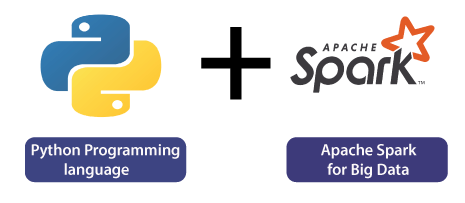**

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[1]") \
                    .appName('SparkByExamples.com') \
                    .getOrCreate()

data = [("James","Smith","USA","CA"),("Michael","Rose","USA","NY"), \
    ("Robert","Williams","USA","CA"),("Maria","Jones","USA","FL") \
  ]
columns=["firstname","lastname","country","state"]
df=spark.createDataFrame(data=data,schema=columns)
df.show()
print(df.collect())

states1=df.rdd.map(lambda x: x[3]).collect()
print(states1)
#['CA', 'NY', 'CA', 'FL']
from collections import OrderedDict 
res = list(OrderedDict.fromkeys(states1)) 
print(res)
#['CA', 'NY', 'FL']


#Example 2
states2=df.rdd.map(lambda x: x.state).collect()
print(states2)
#['CA', 'NY', 'CA', 'FL']

states3=df.select(df.state).collect()
print(states3)
#[Row(state='CA'), Row(state='NY'), Row(state='CA'), Row(state='FL')]

states4=df.select(df.state).rdd.flatMap(lambda x: x).collect()
print(states4)
#['CA', 'NY', 'CA', 'FL']

states5=df.select(df.state).toPandas()['state']
states6=list(states5)
print(states6)
#['CA', 'NY', 'CA', 'FL']

pandDF=df.select(df.state,df.firstname).toPandas()
print(list(pandDF['state']))
print(list(pandDF['firstname']))
print(type(pandDF))
print(type(states4))

+---------+--------+-------+-----+
|firstname|lastname|country|state|
+---------+--------+-------+-----+
|    James|   Smith|    USA|   CA|
|  Michael|    Rose|    USA|   NY|
|   Robert|Williams|    USA|   CA|
|    Maria|   Jones|    USA|   FL|
+---------+--------+-------+-----+

[Row(firstname='James', lastname='Smith', country='USA', state='CA'), Row(firstname='Michael', lastname='Rose', country='USA', state='NY'), Row(firstname='Robert', lastname='Williams', country='USA', state='CA'), Row(firstname='Maria', lastname='Jones', country='USA', state='FL')]
['CA', 'NY', 'CA', 'FL']
['CA', 'NY', 'FL']
['CA', 'NY', 'CA', 'FL']
[Row(state='CA'), Row(state='NY'), Row(state='CA'), Row(state='FL')]
['CA', 'NY', 'CA', 'FL']
['CA', 'NY', 'CA', 'FL']
['CA', 'NY', 'CA', 'FL']
['James', 'Michael', 'Robert', 'Maria']
<class 'pandas.core.frame.DataFrame'>
<class 'list'>


In [ ]:
59 % 10 + 59 // 10

14

In [ ]:
df = spark.read.csv("sampledb.csv", header=True, inferSchema=True)
df = df.select(df.columns[:2]).take(5)
df = spark.createDataFrame(df)
df.show()
df.printSchema()


+---+---+
|  X|  Y|
+---+---+
| 12| 44|
| 45| 23|
| 67| 78|
|  3|  0|
|  5| 78|
+---+---+

root
 |-- X: long (nullable = true)
 |-- Y: long (nullable = true)



In [ ]:
from pyspark.sql.functions import lit,floor
df.withColumn("Sum of digits",floor((df.X%10)+(floor(df.X/10)%10)+(df.Y%10)+(df.Y/10)%10)).show()

+---+---+-------------+
|  X|  Y|Sum of digits|
+---+---+-------------+
| 12| 44|           11|
| 45| 23|           14|
| 67| 78|           28|
|  3|  0|            3|
|  5| 78|           20|
+---+---+-------------+



In [ ]:
import pandas as pd    
data = [['Scott', 50], ['Jeff', 45], ['Thomas', 54],['Ann',34]] 
  
# Create the pandas DataFrame 
pandasDF = pd.DataFrame(data, columns = ['Name', 'Age']) 
  
# print dataframe. 
print(pandasDF)

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master("local[1]") \
    .appName("SparkByExamples.com") \
    .getOrCreate()

sparkDF=spark.createDataFrame(pandasDF) 
sparkDF.printSchema()
sparkDF.show()

     Name  Age
0   Scott   50
1    Jeff   45
2  Thomas   54
3     Ann   34
root
 |-- Name: string (nullable = true)
 |-- Age: long (nullable = true)

+------+---+
|  Name|Age|
+------+---+
| Scott| 50|
|  Jeff| 45|
|Thomas| 54|
|   Ann| 34|
+------+---+



In [ ]:
from pyspark.sql.types import StructType,StructField, StringType, IntegerType
mySchema = StructType([ StructField("First Name", StringType(), True)\
                       ,StructField("Age", IntegerType(), True)])

sparkDF2 = spark.createDataFrame(pandasDF,schema=mySchema)
sparkDF2.printSchema()
sparkDF2.show()


root
 |-- First Name: string (nullable = true)
 |-- Age: integer (nullable = true)

+----------+---+
|First Name|Age|
+----------+---+
|     Scott| 50|
|      Jeff| 45|
|    Thomas| 54|
|       Ann| 34|
+----------+---+



In [ ]:
spark.conf.set("spark.sql.execution.arrow.enabled","true")
spark.conf.set("spark.sql.execution.arrow.pyspark.fallback.enabled","true")

pandasDF2=sparkDF2.select("*").toPandas
print(pandasDF2)

<bound method PandasConversionMixin.toPandas of DataFrame[First Name: string, Age: int]>


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

from pyspark.sql.functions import col,expr
data=[("2019-01-23",1),("2019-06-24",2),("2019-09-20",3)]
spark.createDataFrame(data).toDF("date","increment") \
    .select(col("date"),col("increment"), \
      expr("add_months(to_date(date,'yyyy-MM-dd'),cast(increment as int))").alias("inc_date")) \
    .show()

+----------+---------+----------+
|      date|increment|  inc_date|
+----------+---------+----------+
|2019-01-23|        1|2019-02-23|
|2019-06-24|        2|2019-08-24|
|2019-09-20|        3|2019-12-20|
+----------+---------+----------+



In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
                    .appName('SparkByExamples.com') \
                    .getOrCreate()

data = [('James','Smith','M',3000),
  ('Anna','Rose','F',4100),
  ('Robert','Williams','M',6200), 
]

columns = ["firstname","lastname","gender","salary"]
df = spark.createDataFrame(data=data, schema = columns)
df.show()


if 'salary1' not in df.columns:
    print("aa")

+---------+--------+------+------+
|firstname|lastname|gender|salary|
+---------+--------+------+------+
|    James|   Smith|     M|  3000|
|     Anna|    Rose|     F|  4100|
|   Robert|Williams|     M|  6200|
+---------+--------+------+------+

aa


In [ ]:
# Add new constanct column
from pyspark.sql.functions import lit
df.withColumn("bonus_percent", lit(0.3)).show()

+---------+--------+------+------+-------------+
|firstname|lastname|gender|salary|bonus_percent|
+---------+--------+------+------+-------------+
|    James|   Smith|     M|  3000|          0.3|
|     Anna|    Rose|     F|  4100|          0.3|
|   Robert|Williams|     M|  6200|          0.3|
+---------+--------+------+------+-------------+



In [ ]:
#Add column from existing column
df.withColumn("bonus_amount", df.salary*0.3).show()

+---------+--------+------+------+------------+
|firstname|lastname|gender|salary|bonus_amount|
+---------+--------+------+------+------------+
|    James|   Smith|     M|  3000|       900.0|
|     Anna|    Rose|     F|  4100|      1230.0|
|   Robert|Williams|     M|  6200|      1860.0|
+---------+--------+------+------+------------+



In [ ]:
#Add column by concatinating existing columns
from pyspark.sql.functions import concat_ws
df.withColumn("name", concat_ws(",","firstname",'lastname')) \
  .show()

#Add current date
from pyspark.sql.functions import current_date
df.withColumn("current_date", current_date()) \
  .show()


from pyspark.sql.functions import when
df.withColumn("grade", \
   when((df.salary < 4000), lit("A")) \
     .when((df.salary >= 4000) & (df.salary <= 5000), lit("B")) \
     .otherwise(lit("C")) \
  ).show()
    
# Add column using select
df.select("firstname","salary", lit(0.3).alias("bonus")).show()
df.select("firstname","salary", lit(df.salary * 0.3).alias("bonus_amount")).show()
df.select("firstname","salary", current_date().alias("today_date")).show()

#Add columns using SQL
df.createOrReplaceTempView("PER")
spark.sql("select firstname,salary, '0.3' as bonus from PER").show()
spark.sql("select firstname,salary, salary * 0.3 as bonus_amount from PER").show()
spark.sql("select firstname,salary, current_date() as today_date from PER").show()
spark.sql("select firstname,salary, " +
          "case salary when salary < 4000 then 'A' "+
          "else 'B' END as grade from PER").show()

+---------+--------+------+------+---------------+
|firstname|lastname|gender|salary|           name|
+---------+--------+------+------+---------------+
|    James|   Smith|     M|  3000|    James,Smith|
|     Anna|    Rose|     F|  4100|      Anna,Rose|
|   Robert|Williams|     M|  6200|Robert,Williams|
+---------+--------+------+------+---------------+

+---------+--------+------+------+------------+
|firstname|lastname|gender|salary|current_date|
+---------+--------+------+------+------------+
|    James|   Smith|     M|  3000|  2022-03-08|
|     Anna|    Rose|     F|  4100|  2022-03-08|
|   Robert|Williams|     M|  6200|  2022-03-08|
+---------+--------+------+------+------------+

+---------+--------+------+------+-----+
|firstname|lastname|gender|salary|grade|
+---------+--------+------+------+-----+
|    James|   Smith|     M|  3000|    A|
|     Anna|    Rose|     F|  4100|    B|
|   Robert|Williams|     M|  6200|    C|
+---------+--------+------+------+-----+

+---------+------

In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import approx_count_distinct,collect_list
from pyspark.sql.functions import collect_set,sum,avg,max,countDistinct,count
from pyspark.sql.functions import first, last, kurtosis, min, mean, skewness 
from pyspark.sql.functions import stddev, stddev_samp, stddev_pop, sumDistinct
from pyspark.sql.functions import variance,var_samp,  var_pop

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

simpleData = [("James", "Sales", 3000),
    ("Michael", "Sales", 4600),
    ("Robert", "Sales", 4100),
    ("Maria", "Finance", 3000),
    ("James", "Sales", 3000),
    ("Scott", "Finance", 3300),
    ("Jen", "Finance", 3900),
    ("Jeff", "Marketing", 3000),
    ("Kumar", "Marketing", 2000),
    ("Saif", "Sales", 4100)
  ]
schema = ["employee_name", "department", "salary"]
  
  
df = spark.createDataFrame(data=simpleData, schema = schema)
df.printSchema()
df.show(truncate=False)

print("approx_count_distinct: " + \
      str(df.select(approx_count_distinct("salary")).collect()[0][0]))

print("avg: " + str(df.select(avg("salary")).collect()[0][0]))

df.select(collect_list("salary")).show(truncate=False)

df.select(collect_set("salary")).show(truncate=False)

df2 = df.select(countDistinct("department", "salary"))
df2.show(truncate=False)
print("Distinct Count of Department &amp; Salary: "+str(df2.collect()[0][0]))

print("count: "+str(df.select(count("salary")).collect()[0]))
df.select(first("salary")).show(truncate=False)
df.select(last("salary")).show(truncate=False)
df.select(kurtosis("salary")).show(truncate=False)
df.select(max("salary")).show(truncate=False)
df.select(min("salary")).show(truncate=False)
df.select(mean("salary")).show(truncate=False)
df.select(skewness("salary")).show(truncate=False)
df.select(stddev("salary"), stddev_samp("salary"), \
    stddev_pop("salary")).show(truncate=False)
df.select(sum("salary")).show(truncate=False)
df.select(sumDistinct("salary")).show(truncate=False)
df.select(variance("salary"),var_samp("salary"),var_pop("salary")) \
  .show(truncate=False)


root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- salary: long (nullable = true)

+-------------+----------+------+
|employee_name|department|salary|
+-------------+----------+------+
|James        |Sales     |3000  |
|Michael      |Sales     |4600  |
|Robert       |Sales     |4100  |
|Maria        |Finance   |3000  |
|James        |Sales     |3000  |
|Scott        |Finance   |3300  |
|Jen          |Finance   |3900  |
|Jeff         |Marketing |3000  |
|Kumar        |Marketing |2000  |
|Saif         |Sales     |4100  |
+-------------+----------+------+

approx_count_distinct: 6
avg: 3400.0
+------------------------------------------------------------+
|collect_list(salary)                                        |
+------------------------------------------------------------+
|[3000, 4600, 4100, 3000, 3000, 3300, 3900, 3000, 2000, 4100]|
+------------------------------------------------------------+

+------------------------------------+
|c

/content/spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/functions.py:214: FutureWarning: Deprecated in 3.2, use sum_distinct instead.
  warnings.warn("Deprecated in 3.2, use sum_distinct instead.", FutureWarning)


+--------------------+
|sum(DISTINCT salary)|
+--------------------+
|20900               |
+--------------------+

+-----------------+-----------------+---------------+
|var_samp(salary) |var_samp(salary) |var_pop(salary)|
+-----------------+-----------------+---------------+
|586666.6666666666|586666.6666666666|528000.0       |
+-----------------+-----------------+---------------+



In [ ]:
# -*- coding: utf-8 -*-
"""
author SparkByExamples.com
"""

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[1]") \
                    .appName('SparkByExamples.com') \
                    .getOrCreate()

columns = ["name","languagesAtSchool","currentState"]
data = [("James,,Smith",["Java","Scala","C++"],"CA"), \
    ("Michael,Rose,",["Spark","Java","C++"],"NJ"), \
    ("Robert,,Williams",["CSharp","VB"],"NV")]

df = spark.createDataFrame(data=data,schema=columns)
df.printSchema()
df.show(truncate=False)

from pyspark.sql.functions import col, concat_ws
df2 = df.withColumn("languagesAtSchool",
   concat_ws(",",col("languagesAtSchool")))
df2.printSchema()
df2.show(truncate=False)


df.createOrReplaceTempView("ARRAY_STRING")
spark.sql("select name, concat_ws(',',languagesAtSchool) as languagesAtSchool," + \
    " currentState from ARRAY_STRING") \
    .show(truncate=False)

root
 |-- name: string (nullable = true)
 |-- languagesAtSchool: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- currentState: string (nullable = true)

+----------------+------------------+------------+
|name            |languagesAtSchool |currentState|
+----------------+------------------+------------+
|James,,Smith    |[Java, Scala, C++]|CA          |
|Michael,Rose,   |[Spark, Java, C++]|NJ          |
|Robert,,Williams|[CSharp, VB]      |NV          |
+----------------+------------------+------------+

root
 |-- name: string (nullable = true)
 |-- languagesAtSchool: string (nullable = false)
 |-- currentState: string (nullable = true)

+----------------+-----------------+------------+
|name            |languagesAtSchool|currentState|
+----------------+-----------------+------------+
|James,,Smith    |Java,Scala,C++   |CA          |
|Michael,Rose,   |Spark,Java,C++   |NJ          |
|Robert,,Williams|CSharp,VB        |NV          |
+----------------+------

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StringType, ArrayType,StructType,StructField
spark = SparkSession.builder \
                    .appName('SparkByExamples.com') \
                    .getOrCreate()


arrayCol = ArrayType(StringType(),False)

data = [
 ("James,,Smith",["Java","Scala","C++"],["Spark","Java"],"OH","CA"),
 ("Michael,Rose,",["Spark","Java","C++"],["Spark","Java"],"NY","NJ"),
 ("Robert,,Williams",["CSharp","VB"],["Spark","Python"],"UT","NV")
]

schema = StructType([ 
    StructField("name",StringType(),True), 
    StructField("languagesAtSchool",ArrayType(StringType()),True), 
    StructField("languagesAtWork",ArrayType(StringType()),True), 
    StructField("currentState", StringType(), True), 
    StructField("previousState", StringType(), True) 
  ])

df = spark.createDataFrame(data=data,schema=schema)
df.printSchema()
df.show()

from pyspark.sql.functions import explode
df.select(df.name,explode(df.languagesAtSchool)).show()

from pyspark.sql.functions import split
df.select(split(df.name,",").alias("nameAsArray")).show()

from pyspark.sql.functions import array
df.select(df.name,array(df.currentState,df.previousState).alias("States")).show()

from pyspark.sql.functions import array_contains
df.select(df.name,array_contains(df.languagesAtSchool,"Java")
    .alias("array_contains")).show()

root
 |-- name: string (nullable = true)
 |-- languagesAtSchool: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- languagesAtWork: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- currentState: string (nullable = true)
 |-- previousState: string (nullable = true)

+----------------+------------------+---------------+------------+-------------+
|            name| languagesAtSchool|languagesAtWork|currentState|previousState|
+----------------+------------------+---------------+------------+-------------+
|    James,,Smith|[Java, Scala, C++]|  [Spark, Java]|          OH|           CA|
|   Michael,Rose,|[Spark, Java, C++]|  [Spark, Java]|          NY|           NJ|
|Robert,,Williams|      [CSharp, VB]|[Spark, Python]|          UT|           NV|
+----------------+------------------+---------------+------------+-------------+

+----------------+------+
|            name|   col|
+----------------+------+
|    James,,Smith|  Java|
|    Ja

In [ ]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

a1 = [("James","Smith","USA","CA"),
    ("Michael","Rose","USA","NY"),
    ("Robert","Williams","USA","CA"),
    ("Maria","Jones","USA","FL")
  ]
a = spark.sparkContext.broadcast(a1)
data = a.value
print(data)
b = a.value[2]
print(b)

[('James', 'Smith', 'USA', 'CA'), ('Michael', 'Rose', 'USA', 'NY'), ('Robert', 'Williams', 'USA', 'CA'), ('Maria', 'Jones', 'USA', 'FL')]
('Robert', 'Williams', 'USA', 'CA')


In [ ]:
#Hash Table

import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

data = [("James", "Sales", 3000),
    ("Michael", "Sales", 4600),
    ("Robert", "Sales", 4100),
    ("Maria", "Finance", 3000),
    ("James", "Sales", 3000),
    ("Scott", "Finance", 3300),
    ("Jen", "Finance", 3900),
    ("Jeff", "Marketing", 3000),
    ("Kumar", "Marketing", 2000),
    ("Saif", "Sales", 4100)
  ]
columns = ["employee_name", "department", "salary"]
rdd = spark.sparkContext.parallelize(data)
df = rdd.toDF(columns)
df.show()

+-------------+----------+------+
|employee_name|department|salary|
+-------------+----------+------+
|        James|     Sales|  3000|
|      Michael|     Sales|  4600|
|       Robert|     Sales|  4100|
|        Maria|   Finance|  3000|
|        James|     Sales|  3000|
|        Scott|   Finance|  3300|
|          Jen|   Finance|  3900|
|         Jeff| Marketing|  3000|
|        Kumar| Marketing|  2000|
|         Saif|     Sales|  4100|
+-------------+----------+------+



In [ ]:
col_list=[]
for i in df.columns:
  col_list.append(i)

print(col_list)

['employee_name', 'department', 'salary']


In [ ]:
from pyspark.sql.functions import md5,concat_ws
df = df.withColumn("md5",md5(concat_ws("",*col_list)))
df.show(truncate = False)

+-------------+----------+------+--------------------------------+
|employee_name|department|salary|md5                             |
+-------------+----------+------+--------------------------------+
|James        |Sales     |3000  |23515f7cc6a48556981e949575171aa9|
|Michael      |Sales     |4600  |24dc8d90a84bf29d04cab2232f12482a|
|Robert       |Sales     |4100  |d1369e389260cf72227c6d0521055fa9|
|Maria        |Finance   |3000  |af56daeeff3eee0b02890ab41159d3c2|
|James        |Sales     |3000  |23515f7cc6a48556981e949575171aa9|
|Scott        |Finance   |3300  |302347237977e6c5f2dfcb268d268a41|
|Jen          |Finance   |3900  |e3d453b29823937c9466151a24fbe68d|
|Jeff         |Marketing |3000  |260e9b781688a954fc344dbff85b59b6|
|Kumar        |Marketing |2000  |29184fa340c122f6b123b37613139f80|
|Saif         |Sales     |4100  |3305e345d2ca4298188eacd6aa80e8f6|
+-------------+----------+------+--------------------------------+



In [ ]:
from tkinter import *
root = Tk()
root.wm_title("Your program")
mylist1 = []
mylist2 = []
mylist3 = []
mylist4 = []
def get_data(l,m,n,o):
    l.append(box1.get())
    l.append(box2.get())
    m.append(box1.get())
    m.append(box2.get())
    n.append(box1.get())
    n.append(box2.get())
    o.append(box1.get())
    o.append(box2.get())
    print(l)
    print(m)
    print(n)
    print(o)
var1 = StringVar()
var1.set("Name:")
var2 = StringVar()
var2.set("Mobile:")
label1 = Label(root,textvariable=var1,height = 2)
label1.grid(row=0,column=0)
label2 = Label(root,textvariable=var2,height = 2)
label2.grid(row=1,column=0)
Name=StringVar()
Mobile=StringVar()
box1=Entry(root,bd=4,textvariable=Name)
box1.grid(row=0,column=1)
box2=Entry(root,bd=4,textvariable=Mobile)
box2.grid(row=1,column=1)
botonA= Button(root, text = "Submit",command=lambda: get_data(mylist1,mylist2,mylist3,mylist4), width=5)
botonA.grid(row=3,column=1)
root.mainloop()


TclError: ignored

In [ ]:

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('ey').getOrCreate()

from pyspark.sql.functions import expr
#Concatenate columns
data=[("James","Bond"),("Scott","Varsa")] 
df=spark.createDataFrame(data).toDF("col1","col2") 
df.withColumn("Name",expr(" col1 ||','|| col2")).show()

#Using CASE WHEN sql expression
data = [("James","M"),("Michael","F"),("Jen","")]
columns = ["name","gender"]
df = spark.createDataFrame(data = data, schema = columns)
df2 = df.withColumn("gender", expr("CASE WHEN gender = 'M' THEN 'Male' " +
           "WHEN gender = 'F' THEN 'Female' ELSE 'unknown' END"))
df2.show()

#Add months from a value of another column
data=[("2019-01-23",1),("2019-06-24",2),("2019-09-20",3)] 
df=spark.createDataFrame(data).toDF("date","increment") 
df.select(df.date,df.increment,
     expr("add_months(date,increment)")
  .alias("inc_date")).show()

# Providing alias using 'as'
df.select(df.date,df.increment,
     expr("""add_months(date,increment) as inc_date""")
  ).show()

# Add
df.select(df.date,df.increment,
     expr("increment + 5 as new_increment")
  ).show()

df.select("increment",expr("cast(increment as string) as str_increment")) \
  .printSchema()
#Use expr()  to filter the rows
data=[(100,2),(200,3000),(500,500)] 
df=spark.createDataFrame(data).toDF("col1","col2") 
df.filter(expr("col1 == col2")).show()

+-----+-----+-----------+
| col1| col2|       Name|
+-----+-----+-----------+
|James| Bond| James,Bond|
|Scott|Varsa|Scott,Varsa|
+-----+-----+-----------+

+-------+-------+
|   name| gender|
+-------+-------+
|  James|   Male|
|Michael| Female|
|    Jen|unknown|
+-------+-------+

+----------+---------+----------+
|      date|increment|  inc_date|
+----------+---------+----------+
|2019-01-23|        1|2019-02-23|
|2019-06-24|        2|2019-08-24|
|2019-09-20|        3|2019-12-20|
+----------+---------+----------+

+----------+---------+----------+
|      date|increment|  inc_date|
+----------+---------+----------+
|2019-01-23|        1|2019-02-23|
|2019-06-24|        2|2019-08-24|
|2019-09-20|        3|2019-12-20|
+----------+---------+----------+

+----------+---------+-------------+
|      date|increment|new_increment|
+----------+---------+-------------+
|2019-01-23|        1|            6|
|2019-06-24|        2|            7|
|2019-09-20|        3|            8|
+----------+----

In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField, StringType, IntegerType, ArrayType
from pyspark.sql.functions import col,array_contains

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

arrayStructureData = [
        (("James","","Smith"),["Java","Scala","C++"],"OH","M"),
        (("Anna","Rose",""),["Spark","Java","C++"],"NY","F"),
        (("Julia","","Williams"),["CSharp","VB"],"OH","F"),
        (("Maria","Anne","Jones"),["CSharp","VB"],"NY","M"),
        (("Jen","Mary","Brown"),["CSharp","VB"],"NY","M"),
        (("Mike","Mary","Williams"),["Python","VB"],"OH","M")
        ]
        
arrayStructureSchema = StructType([
        StructField('name', StructType([
             StructField('firstname', StringType(), True),
             StructField('middlename', StringType(), True),
             StructField('lastname', StringType(), True)
             ])),
         StructField('languages', ArrayType(StringType()), True),
         StructField('state', StringType(), True),
         StructField('gender', StringType(), True)
         ])


df = spark.createDataFrame(data = arrayStructureData, schema = arrayStructureSchema)
df.printSchema()
df.show(truncate=False)

#Equals
df.filter(df.state == "OH") \
    .show(truncate=False)

#Not equals
df.filter(~(df.state == "OH")) \
    .show(truncate=False)
df.filter(df.state != "OH") \
    .show(truncate=False)    
    
df.filter(col("state") == "OH") \
    .show(truncate=False)    
    
df.filter("gender  == 'M'") \
    .show(truncate=False)    

df.filter("gender  <> 'M'") \
    .show(truncate=False)    

#IS IN
li=["OH","CA","DE"]
df.filter(df.state.isin(li)).show()
#IS NOT IN
df.filter(~df.state.isin(li)).show()

df.filter( (df.state  == "OH") & (df.gender  == "M") ) \
    .show(truncate=False)        

df.filter(array_contains(df.languages,"Java")) \
    .show(truncate=False)        

df.filter(df.name.lastname == "Williams") \
    .show(truncate=False) 

df.filter(df.state.startswith("N")).show()
df.filter(df.state.endswith("H")).show()
df.filter(df.state.like("N%")).show()
    

root
 |-- name: struct (nullable = true)
 |    |-- firstname: string (nullable = true)
 |    |-- middlename: string (nullable = true)
 |    |-- lastname: string (nullable = true)
 |-- languages: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- state: string (nullable = true)
 |-- gender: string (nullable = true)

+----------------------+------------------+-----+------+
|name                  |languages         |state|gender|
+----------------------+------------------+-----+------+
|{James, , Smith}      |[Java, Scala, C++]|OH   |M     |
|{Anna, Rose, }        |[Spark, Java, C++]|NY   |F     |
|{Julia, , Williams}   |[CSharp, VB]      |OH   |F     |
|{Maria, Anne, Jones}  |[CSharp, VB]      |NY   |M     |
|{Jen, Mary, Brown}    |[CSharp, VB]      |NY   |M     |
|{Mike, Mary, Williams}|[Python, VB]      |OH   |M     |
+----------------------+------------------+-----+------+

+----------------------+------------------+-----+------+
|name                  |langu

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
get_ipython().system_raw('./ngrok http 4050 &')
!curl -s http://localhost:4040/api/tunnels

--2021-12-18 05:06:21--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.202.168.65, 18.205.222.128, 54.161.241.46, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.202.168.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  5.57MB/s    in 2.4s    

2021-12-18 05:06:24 (5.57 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
{"tunnels":[],"uri":"/api/tunnels"}


In [ ]:
df = spark.read.csv("Flipkart.csv", header=True, inferSchema=True)

In [ ]:
df.show(5)

+------+--------------+--------+----------+-------------+-----------+-----------------+--------------+----------------+----------------+--------------------+-----------------+--------------------+-------------------+-------------+-------+-----------------+-----------+-----------+----------+---------+---------+--------------------+-------+--------+
|Row ID|Order Priority|Discount|Unit Price|Shipping Cost|Customer ID|    Customer Name|     Ship Mode|Customer Segment|Product Category|Product Sub-Category|Product Container|        Product Name|Product Base Margin|      Country| Region|State or Province|       City|Postal Code|Order Date|Ship Date|   Profit|Quantity ordered new|  Sales|Order ID|
+------+--------------+--------+----------+-------------+-----------+-----------------+--------------+----------------+----------------+--------------------+-----------------+--------------------+-------------------+-------------+-------+-----------------+-----------+-----------+----------+---------

In [ ]:
df1 = spark.read.csv("Flipkart.csv", header=True, inferSchema=True)
df1.show(10)

+------+--------------+--------+----------+-------------+-----------+-----------------+--------------+----------------+----------------+--------------------+-----------------+--------------------+-------------------+-------------+-------+-----------------+-----------+-----------+----------+---------+---------+--------------------+-------+--------+
|Row ID|Order Priority|Discount|Unit Price|Shipping Cost|Customer ID|    Customer Name|     Ship Mode|Customer Segment|Product Category|Product Sub-Category|Product Container|        Product Name|Product Base Margin|      Country| Region|State or Province|       City|Postal Code|Order Date|Ship Date|   Profit|Quantity ordered new|  Sales|Order ID|
+------+--------------+--------+----------+-------------+-----------+-----------------+--------------+----------------+----------------+--------------------+-----------------+--------------------+-------------------+-------------+-------+-----------------+-----------+-----------+----------+---------

In [ ]:
#Q1. Print top five customers as per sales values.

from pyspark.sql.functions import sum, col, desc
df1.groupBy("Customer ID","Customer Name").agg(sum("Sales").alias("sum_sales")).sort(desc("Sum_sales")).show(5)




+-----------+-----------------+------------------+
|Customer ID|    Customer Name|         sum_sales|
+-----------+-----------------+------------------+
|        553|Kristine Connolly|          50475.31|
|       1733| Nina Horne Kelly|          48295.12|
|        491|     Toni Swanson|          32194.12|
|       2571| Rosemary O'Brien|          29916.01|
|       2670|      Yvonne Mann|28779.129999999997|
+-----------+-----------------+------------------+
only showing top 5 rows



In [ ]:
#Q2. Print  customer name who took maximum discounts

from pyspark.sql.functions import sum, col, desc
df1.groupBy("Customer ID","Customer Name") \
  .agg(sum("Discount").alias("sum_discount")) \
  .sort(desc("Sum_discount")) \
  .show(1)

+-----------+-------------+------------+
|Customer ID|Customer Name|sum_discount|
+-----------+-------------+------------+
|        699|   Jenny Gold|        0.56|
+-----------+-------------+------------+
only showing top 1 row



In [ ]:
#Q3. Print all customers starting from “A” where ship mode is “Express Air”
from pyspark.sql.functions import col
df2 =df1.filter(col("Customer Name").startswith("A")).where(col("Ship Mode") == "Express Air")
df2.show()

+------+--------------+--------+----------+-------------+-----------+--------------------+-----------+----------------+----------------+--------------------+-----------------+--------------------+-------------------+-------------+-------+-----------------+----------------+-----------+----------+---------+----------+--------------------+--------+--------+
|Row ID|Order Priority|Discount|Unit Price|Shipping Cost|Customer ID|       Customer Name|  Ship Mode|Customer Segment|Product Category|Product Sub-Category|Product Container|        Product Name|Product Base Margin|      Country| Region|State or Province|            City|Postal Code|Order Date|Ship Date|    Profit|Quantity ordered new|   Sales|Order ID|
+------+--------------+--------+----------+-------------+-----------+--------------------+-----------+----------------+----------------+--------------------+-----------------+--------------------+-------------------+-------------+-------+-----------------+----------------+-----------+-

In [ ]:
#Q4. Find the relation between shipping cost and ship mode

from pyspark.sql.functions import sum, col, desc, asc
df1.groupBy("Ship Mode") \
  .agg(sum("Shipping Cost").alias("sum_Shipping Cost")) \
  .sort(desc("sum_Shipping Cost")).show()

+--------------+------------------+
|     Ship Mode| sum_Shipping Cost|
+--------------+------------------+
|Delivery Truck|12137.800000000007|
|   Regular Air|10984.569999999962|
|   Express Air| 2191.459999999999|
+--------------+------------------+



In [ ]:
#Q5. Find product category where shipping cost is very high and very low.
from pyspark.sql.functions import sum, col, desc, asc
df1.groupBy("Product Category") \
  .agg(sum("Shipping Cost").alias("sum_Shipping Cost")) \
  .sort(desc("sum_Shipping Cost")).show(1)
df1.groupBy("Product Category") \
  .agg(sum("Shipping Cost").alias("sum_Shipping Cost")) \
  .sort(asc("sum_Shipping Cost")) \
  .show(1)

+----------------+------------------+
|Product Category| sum_Shipping Cost|
+----------------+------------------+
|       Furniture|12318.240000000003|
+----------------+------------------+
only showing top 1 row

+----------------+-----------------+
|Product Category|sum_Shipping Cost|
+----------------+-----------------+
|      Technology|4545.139999999976|
+----------------+-----------------+
only showing top 1 row



In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[1]") \
                    .appName('IBM') \
                    .getOrCreate()

data = [("James","Smith","USA","CA"),("Michael","Rose","USA","NY"), \
    ("Robert","Williams","India","CA"),("Maria","Jones","UAE","FL") \
  ]
columns=["firstname","lastname","country","state"]
df=spark.createDataFrame(data=data,schema=columns)
df.show()
print(df.collect())

+---------+--------+-------+-----+
|firstname|lastname|country|state|
+---------+--------+-------+-----+
|    James|   Smith|    USA|   CA|
|  Michael|    Rose|    USA|   NY|
|   Robert|Williams|  India|   CA|
|    Maria|   Jones|    UAE|   FL|
+---------+--------+-------+-----+

[Row(firstname='James', lastname='Smith', country='USA', state='CA'), Row(firstname='Michael', lastname='Rose', country='USA', state='NY'), Row(firstname='Robert', lastname='Williams', country='India', state='CA'), Row(firstname='Maria', lastname='Jones', country='UAE', state='FL')]


In [ ]:
states1=df.rdd.map(lambda x: x[2]).collect()
print(states1)

['USA', 'USA', 'India', 'UAE']


In [ ]:
from collections import OrderedDict 
res = list(OrderedDict.fromkeys(states1)) 
print(res)

['USA', 'India', 'UAE']


In [ ]:
states5=df.select(df.state).toPandas()['state']
states6=list(states5)
print(states6)

['CA', 'NY', 'CA', 'FL']


In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.functions import to_timestamp, current_timestamp
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, LongType

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

schema = StructType([
            StructField("seq", StringType(), True)])

dates = [['1']]

df = spark.createDataFrame(dates, schema=schema)
df.withColumn(withColumn("CTS",current_timestamp().show()))

NameError: ignored

In [ ]:
from pyspark.sql import SparkSession
# Create SparkSession
spark = SparkSession.builder \
               .appName('SparkByExamples.com') \
               .getOrCreate()
data=[["1"]]
df=spark.createDataFrame(data,["id"])
from pyspark.sql.functions import *
df.withColumn("current_date",current_date()) \
  .withColumn("current_timestamp",current_timestamp()) \
  .show(truncate=False)

+---+------------+-----------------------+
|id |current_date|current_timestamp      |
+---+------------+-----------------------+
|1  |2021-12-09  |2021-12-09 04:48:08.525|
+---+------------+-----------------------+



In [ ]:

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

from pyspark.sql.functions import col,expr

data=[("2019-01-23",1),("2019-06-24",2),("2019-09-20",3)]

spark.createDataFrame(data).toDF("date","increment") \
    .select(col("date"),col("increment"), \
      expr("add_months(to_date(date,'yyyy-MM-dd'),cast(increment as int))").alias("inc_date")) \
    .show()

+----------+---------+----------+
|      date|increment|  inc_date|
+----------+---------+----------+
|2019-01-23|        1|2019-02-23|
|2019-06-24|        2|2019-08-24|
|2019-09-20|        3|2019-12-20|
+----------+---------+----------+



In [ ]:
spark.sql("select current_Date() , add_months(current_Date(),-1) as last_month").show()

+--------------+----------+
|current_date()|last_month|
+--------------+----------+
|    2022-03-07|2022-02-07|
+--------------+----------+



In [ ]:
spark.sql("select current_Date() , add_months(current_Date(),1) as last_month").show()

+--------------+----------+
|current_date()|last_month|
+--------------+----------+
|    2021-12-09|2022-01-09|
+--------------+----------+



In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
                    .appName('SparkByExamples.com') \
                    .getOrCreate()

data = [('James','Smith','M',3000),
  ('Anna','Rose','F',4100),
  ('Robert','Williams','M',6200), 
]

columns = ["firstname","lastname","gender","salary"]
df = spark.createDataFrame(data=data, schema = columns)
df.show()

+---------+--------+------+------+
|firstname|lastname|gender|salary|
+---------+--------+------+------+
|    James|   Smith|     M|  3000|
|     Anna|    Rose|     F|  4100|
|   Robert|Williams|     M|  6200|
+---------+--------+------+------+



In [ ]:
from pyspark.sql.functions import when , lit
df.withColumn("grade",when((df.salary < 4000), lit("A")).when((df.salary >= 4000) & (df.salary <= 5000), lit("B")).otherwise(lit("C"))).show()

+---------+--------+------+------+-----+
|firstname|lastname|gender|salary|grade|
+---------+--------+------+------+-----+
|    James|   Smith|     M|  3000|    A|
|     Anna|    Rose|     F|  4100|    B|
|   Robert|Williams|     M|  6200|    C|
+---------+--------+------+------+-----+



In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import approx_count_distinct,collect_list
from pyspark.sql.functions import collect_set,sum,avg,max,countDistinct,count
from pyspark.sql.functions import first, last, kurtosis, min, mean, skewness 
from pyspark.sql.functions import stddev, stddev_samp, stddev_pop, sumDistinct
from pyspark.sql.functions import variance,var_samp,  var_pop

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

simpleData = [("James", "Sales", 3000),
    ("Michael", "Sales", 4600),
    ("Robert", "Sales", 4100),
    ("Maria", "Finance", 3000),
    ("James", "Sales", 3000),
    ("Scott", "Finance", 3300),
    ("Jen", "Finance", 3900),
    ("Jeff", "Marketing", 3000),
    ("Kumar", "Marketing", 2000),
    ("Saif", "Sales", 4100)
  ]
schema = ["employee_name", "department", "salary"]
  
  
df = spark.createDataFrame(data=simpleData, schema = schema)
df.printSchema()
df.show(truncate=False)

print("approx_count_distinct: " + \
      str(df.select(approx_count_distinct("salary")).collect()[0][0]))

root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- salary: long (nullable = true)

+-------------+----------+------+
|employee_name|department|salary|
+-------------+----------+------+
|James        |Sales     |3000  |
|Michael      |Sales     |4600  |
|Robert       |Sales     |4100  |
|Maria        |Finance   |3000  |
|James        |Sales     |3000  |
|Scott        |Finance   |3300  |
|Jen          |Finance   |3900  |
|Jeff         |Marketing |3000  |
|Kumar        |Marketing |2000  |
|Saif         |Sales     |4100  |
+-------------+----------+------+

approx_count_distinct: 6


In [ ]:
from pyspark.sql.functions import collect_set,sum,avg,max,countDistinct,count
print("avg: " + str(df.select(avg("salary")).collect()[0][0]))

avg: 4433.333333333333


In [ ]:
print("avg: " + str(df.select(avg("salary")).collect()[0][0]))

avg: 3400.0


In [ ]:
df.select(collect_list("salary")).show(truncate=False)

+------------------------------------------------------------+
|collect_list(salary)                                        |
+------------------------------------------------------------+
|[3000, 4600, 4100, 3000, 3000, 3300, 3900, 3000, 2000, 4100]|
+------------------------------------------------------------+



In [ ]:
df.select(collect_set("salary")).show(truncate=False)

+------------------------------------+
|collect_set(salary)                 |
+------------------------------------+
|[4600, 3000, 3900, 4100, 3300, 2000]|
+------------------------------------+



In [ ]:
a = [1,2,3]
type(a)

list

In [ ]:

type(df)

pyspark.sql.dataframe.DataFrame

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Manish').getOrCreate()
df=spark.createDataFrame(data=[(1,2,3),(4,5,6),(3,2,1)\
                              ,(6,1,-4),(0,2,-2),(6,4,1)\
                              ,(4,5,2),(5,-3,-5),(6,4,-1)]\
                              ,schema=['x1','x2','x3'])
df.show()


+---+---+---+
| x1| x2| x3|
+---+---+---+
|  1|  2|  3|
|  4|  5|  6|
|  3|  2|  1|
|  6|  1| -4|
|  0|  2| -2|
|  6|  4|  1|
|  4|  5|  2|
|  5| -3| -5|
|  6|  4| -1|
+---+---+---+



In [ ]:
data = [('James','','Smith','1991-04-01','M',3000),
  ('Michael','Rose','','2000-05-19','M',4000),
  ('Robert','','Williams','1978-09-05','M',4000),
  ('Maria','Anne','Jones','1967-12-01','F',4000),
  ('Jen','Mary','Brown','1980-02-17','F',-1)
]
columns = ["firstname","middlename","lastname","dob","gender","salary"]
df = spark.createDataFrame(data=data, schema = columns)
df.show()


+---------+----------+--------+----------+------+------+
|firstname|middlename|lastname|       dob|gender|salary|
+---------+----------+--------+----------+------+------+
|    James|          |   Smith|1991-04-01|     M|  3000|
|  Michael|      Rose|        |2000-05-19|     M|  4000|
|   Robert|          |Williams|1978-09-05|     M|  4000|
|    Maria|      Anne|   Jones|1967-12-01|     F|  4000|
|      Jen|      Mary|   Brown|1980-02-17|     F|    -1|
+---------+----------+--------+----------+------+------+



In [ ]:
import pandas as pd
import numpy as np;
import string;
z= [];
letters = [];

for num in range(1, 20):
        if num % 2 != 0:
          z.append(num)
       
for c in range(97, 107):
        letters.append(chr(c))

numbers = np.random.randint(100,200,10)
df=pd.DataFrame({"a":z,"b":letters,"c":numbers})
df


,a,b,c
0,1,a,124
1,3,b,125
2,5,c,136
3,7,d,151
4,9,e,188
5,11,f,154
6,13,g,115
7,15,h,151
8,17,i,139
9,19,j,160


In [ ]:

from datetime import date
a=[i for i in range(20) if i%2!=0]
a= tuple(a)
b= ('a', 'b', 'c', 'd', 'e' ,'f', 'g', 'h', 'i', 'j')
import random
c=[]
for i in range(10):
  c.append(random.randint(100,200))
c= tuple(c)
c
from datetime import date
d=[]
for i in range(10):
  d.append(date.today())
d= tuple(d)
f=[]
for i in range(10):
  e=[]
  e.append(a[i])
  e.append(b[i])
  e.append(c[i])
  e.append(d[i])
  f.append(tuple(e))
df2=spark.createDataFrame(data=f, schema=['x1','x2','x3', 'x4'])
df2.show()


+---+---+---+----------+
| x1| x2| x3|        x4|
+---+---+---+----------+
|  1|  a|168|2022-02-12|
|  3|  b|154|2022-02-12|
|  5|  c|194|2022-02-12|
|  7|  d|112|2022-02-12|
|  9|  e|134|2022-02-12|
| 11|  f|180|2022-02-12|
| 13|  g|151|2022-02-12|
| 15|  h|175|2022-02-12|
| 17|  i|175|2022-02-12|
| 19|  j|197|2022-02-12|
+---+---+---+----------+



In [ ]:
columns = ["language","users_count"]
data = [("Java", "20000"), ("Python", "100000"), ("Scala", "3000")]
spark = SparkSession.builder.appName('SparkRDD.com').getOrCreate()
rdd = spark.sparkContext.parallelize(data)
dfFromRDD1 = rdd.toDF(columns)
dfFromRDD1


DataFrame[language: string, users_count: string]

In [ ]:
import random
print(random.randint(0,500))

391


In [ ]:
data2 = [(1,"James Smith"), (2,"Michael Rose"),
    (3,"Robert Williams"), (4,"Rames Rose"),(5,"Rames rose")
  ]
df2 = spark.createDataFrame(data = data2, schema = ["id","name"])

df2.filter(df2.name.like("%rose%")).show()
df2.filter(df2.name.rlike("(?i)^*rose$")).show()
df2.filter(df2.name.rlike("(?i)^*Rose$")).show()

+---+----------+
| id|      name|
+---+----------+
|  5|Rames rose|
+---+----------+

+---+------------+
| id|        name|
+---+------------+
|  2|Michael Rose|
|  4|  Rames Rose|
|  5|  Rames rose|
+---+------------+

+---+------------+
| id|        name|
+---+------------+
|  2|Michael Rose|
|  4|  Rames Rose|
|  5|  Rames rose|
+---+------------+



In [ ]:
from pyspark.sql.functions import col
data = [
    ("James",None,"M"),
    ("Anna","NY","F"),
    ("Julia",None,None)
  ]

columns = ["name","state","gender"]
df = spark.createDataFrame(data,columns)
df.show()

df.filter("state is NULL").show()
df.filter(df.state.isNull()).show()
df.filter(col("state").isNull()).show() 

df.na.drop("state").show()

+-----+-----+------+
| name|state|gender|
+-----+-----+------+
|James| null|     M|
| Anna|   NY|     F|
|Julia| null|  null|
+-----+-----+------+

+-----+-----+------+
| name|state|gender|
+-----+-----+------+
|James| null|     M|
|Julia| null|  null|
+-----+-----+------+

+-----+-----+------+
| name|state|gender|
+-----+-----+------+
|James| null|     M|
|Julia| null|  null|
+-----+-----+------+

+-----+-----+------+
| name|state|gender|
+-----+-----+------+
|James| null|     M|
|Julia| null|  null|
+-----+-----+------+



In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col,sum,avg,max

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

simpleData = [("James","Sales","NY",90000,34,10000),
    ("Michael","Sales","NY",86000,56,20000),
    ("Robert","Sales","CA",81000,30,23000),
    ("Maria","Finance","CA",90000,24,23000),
    ("Raman","Finance","CA",99000,40,24000),
    ("Scott","Finance","NY",83000,36,19000),
    ("Jen","Finance","NY",79000,53,15000),
    ("Jeff","Marketing","CA",80000,25,18000),
    ("Kumar","Marketing","NY",91000,50,21000)
  ]

schema = ["employee_name","department","state","salary","age","bonus"]
df = spark.createDataFrame(data=simpleData, schema = schema)
df.printSchema()
df.show(truncate=False)

root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- state: string (nullable = true)
 |-- salary: long (nullable = true)
 |-- age: long (nullable = true)
 |-- bonus: long (nullable = true)

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|James        |Sales     |NY   |90000 |34 |10000|
|Michael      |Sales     |NY   |86000 |56 |20000|
|Robert       |Sales     |CA   |81000 |30 |23000|
|Maria        |Finance   |CA   |90000 |24 |23000|
|Raman        |Finance   |CA   |99000 |40 |24000|
|Scott        |Finance   |NY   |83000 |36 |19000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Jeff         |Marketing |CA   |80000 |25 |18000|
|Kumar        |Marketing |NY   |91000 |50 |21000|
+-------------+----------+-----+------+---+-----+



In [ ]:
df.groupBy("department").avg("age").show()

+----------+--------+
|department|avg(age)|
+----------+--------+
|     Sales|    40.0|
|   Finance|   38.25|
| Marketing|    37.5|
+----------+--------+



In [ ]:
data = [
    ("James",None,"M"),
    ("Anna","NY","F"),
    ("Julia",None,None)
  ]

columns = ["name","state","gender"]
df = spark.createDataFrame(data,columns)
df.show()

+-----+-----+------+
| name|state|gender|
+-----+-----+------+
|James| null|     M|
| Anna|   NY|     F|
|Julia| null|  null|
+-----+-----+------+



In [ ]:
df = df.na.drop(subset=["state"])
df.show()

+----+-----+------+
|name|state|gender|
+----+-----+------+
|Anna|   NY|     F|
+----+-----+------+



In [ ]:
df.na.drop(subset=["state"])

DataFrame[name: string, state: string, gender: string]

In [ ]:
df.show()

+-----+-----+------+
| name|state|gender|
+-----+-----+------+
|James| null|     M|
| Anna|   NY|     F|
|Julia| null|  null|
+-----+-----+------+



In [ ]:
df = df.na.fill(value = "ABC",subset=["state"])
df.show()

+-----+-----+------+
| name|state|gender|
+-----+-----+------+
|James|  ABC|     M|
| Anna|   NY|     F|
|Julia|  ABC|  null|
+-----+-----+------+



In [ ]:
df = df.drop("state")
df.show()

+-----+------+
| name|gender|
+-----+------+
|James|     M|
| Anna|     F|
|Julia|  null|
+-----+------+



In [ ]:
df.show()

+-----+------+
| name|gender|
+-----+------+
|James|     M|
| Anna|     F|
|Julia|  null|
+-----+------+



In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col,sum,avg,max

spark = SparkSession.builder \
                    .appName('SparkByExamples.com') \
                    .getOrCreate()

simpleData = [("James","Sales","NY",90000,34,10000),
    ("Michael","Sales","NV",86000,56,20000),
    ("Robert","Sales","CA",81000,30,23000),
    ("Maria","Finance","CA",90000,24,23000),
    ("Raman","Finance","DE",99000,40,24000),
    ("Scott","Finance","NY",83000,36,19000),
    ("Jen","Finance","NY",79000,53,15000),
    ("Jeff","Marketing","NV",80000,25,18000),
    ("Kumar","Marketing","NJ",91000,50,21000)
  ]

schema = ["employee_name","department","state","salary","age","bonus"]
df = spark.createDataFrame(data=simpleData, schema = schema)
df.printSchema()
df.show(truncate=False)

root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- state: string (nullable = true)
 |-- salary: long (nullable = true)
 |-- age: long (nullable = true)
 |-- bonus: long (nullable = true)

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|James        |Sales     |NY   |90000 |34 |10000|
|Michael      |Sales     |NV   |86000 |56 |20000|
|Robert       |Sales     |CA   |81000 |30 |23000|
|Maria        |Finance   |CA   |90000 |24 |23000|
|Raman        |Finance   |DE   |99000 |40 |24000|
|Scott        |Finance   |NY   |83000 |36 |19000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Jeff         |Marketing |NV   |80000 |25 |18000|
|Kumar        |Marketing |NJ   |91000 |50 |21000|
+-------------+----------+-----+------+---+-----+



In [ ]:
df.groupBy("state").sum("salary").show()

+-----+-----------+
|state|sum(salary)|
+-----+-----------+
|   NJ|      91000|
|   NV|     166000|
|   CA|     171000|
|   DE|      99000|
|   NY|     252000|
+-----+-----------+



In [ ]:
df.groupBy("state") \
          .agg(sum("salary").alias("sum_salary")).show()

+-----+----------+
|state|sum_salary|
+-----+----------+
|   NJ|     91000|
|   NV|    166000|
|   CA|    171000|
|   DE|     99000|
|   NY|    252000|
+-----+----------+



In [ ]:
dfFilter=dfGroup.filter(dfGroup.sum_salary > 100000)
dfFilter.show()

+-----+----------+
|state|sum_salary|
+-----+----------+
|   NV|    166000|
|   CA|    171000|
|   NY|    252000|
+-----+----------+



In [ ]:
dfFilter.sort("sum_salary").show()

+-----+----------+
|state|sum_salary|
+-----+----------+
|   NV|    166000|
|   CA|    171000|
|   NY|    252000|
+-----+----------+



In [ ]:
from pyspark.sql.functions import desc
dfFilter.sort(desc("sum_salary")).show()

+-----+----------+
|state|sum_salary|
+-----+----------+
|   NY|    252000|
|   CA|    171000|
|   NV|    166000|
+-----+----------+



In [ ]:
df.groupBy("state") \
  .agg(sum("salary").alias("sum_salary")) \
  .filter(col("sum_salary") > 100000)  \
  .sort(desc("sum_salary")) \
  .show()


+-----+----------+
|state|sum_salary|
+-----+----------+
|   NY|    252000|
|   CA|    171000|
|   NV|    166000|
+-----+----------+



In [ ]:
df.createOrReplaceTempView("EMP")
spark.sql("select state, sum(salary) as sum_salary from EMP " +
          "group by state having sum_salary > 100000 " + 
          "order by sum_salary desc").show()

+-----+----------+
|state|sum_salary|
+-----+----------+
|   NY|    252000|
|   CA|    171000|
|   NV|    166000|
+-----+----------+



In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

emp = [(1,"Smith",-1,"2018","10","M",3000), \
    (2,"Rose",1,"2010","20","M",4000), \
    (3,"Williams",1,"2010","10","M",1000), \
    (4,"Jones",2,"2005","10","F",2000), \
    (5,"Brown",2,"2010","40","",-1), \
      (6,"Brown",2,"2010","50","",-1) \
  ]
empColumns = ["emp_id","name","superior_emp_id","year_joined", \
       "emp_dept_id","gender","salary"]

empDF = spark.createDataFrame(data=emp, schema = empColumns)
empDF.printSchema()
empDF.show(truncate=False)


root
 |-- emp_id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- superior_emp_id: long (nullable = true)
 |-- year_joined: string (nullable = true)
 |-- emp_dept_id: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: long (nullable = true)

+------+--------+---------------+-----------+-----------+------+------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|
+------+--------+---------------+-----------+-----------+------+------+
|1     |Smith   |-1             |2018       |10         |M     |3000  |
|2     |Rose    |1              |2010       |20         |M     |4000  |
|3     |Williams|1              |2010       |10         |M     |1000  |
|4     |Jones   |2              |2005       |10         |F     |2000  |
|5     |Brown   |2              |2010       |40         |      |-1    |
|6     |Brown   |2              |2010       |50         |      |-1    |
+------+--------+---------------+-----------+-----------+------+-----

In [ ]:
dept = [("Finance",10), \
    ("Marketing",20), \
    ("Sales",30), \
    ("IT",40) \
  ]
deptColumns = ["dept_name","dept_id"]
deptDF = spark.createDataFrame(data=dept, schema = deptColumns)
deptDF.printSchema()
deptDF.show(truncate=False)

root
 |-- dept_name: string (nullable = true)
 |-- dept_id: long (nullable = true)

+---------+-------+
|dept_name|dept_id|
+---------+-------+
|Finance  |10     |
|Marketing|20     |
|Sales    |30     |
|IT       |40     |
+---------+-------+



In [ ]:
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"outer") \
    .show(truncate=False)

+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|dept_name|dept_id|
+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|1     |Smith   |-1             |2018       |10         |M     |3000  |Finance  |10     |
|3     |Williams|1              |2010       |10         |M     |1000  |Finance  |10     |
|4     |Jones   |2              |2005       |10         |F     |2000  |Finance  |10     |
|2     |Rose    |1              |2010       |20         |M     |4000  |Marketing|20     |
|null  |null    |null           |null       |null       |null  |null  |Sales    |30     |
|5     |Brown   |2              |2010       |40         |      |-1    |IT       |40     |
|6     |Brown   |2              |2010       |50         |      |-1    |null     |null   |
+------+--------+---------------+-----------+-----------+------+------+---------+-------+



In [ ]:
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"fullouter") \
    .show(truncate=False)

+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|dept_name|dept_id|
+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|1     |Smith   |-1             |2018       |10         |M     |3000  |Finance  |10     |
|3     |Williams|1              |2010       |10         |M     |1000  |Finance  |10     |
|4     |Jones   |2              |2005       |10         |F     |2000  |Finance  |10     |
|2     |Rose    |1              |2010       |20         |M     |4000  |Marketing|20     |
|null  |null    |null           |null       |null       |null  |null  |Sales    |30     |
|5     |Brown   |2              |2010       |40         |      |-1    |IT       |40     |
|6     |Brown   |2              |2010       |50         |      |-1    |null     |null   |
+------+--------+---------------+-----------+-----------+------+------+---------+-------+



In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
                    .appName('SparkByExamples.com') \
                    .getOrCreate()

data = [('James','Smith','M',30),
  ('Anna','Rose','F',41),
  ('Robert','Williams','M',62), 
]

columns = ["firstname","lastname","gender","salary"]
df = spark.createDataFrame(data=data, schema = columns)
df.show()


+---------+--------+------+------+
|firstname|lastname|gender|salary|
+---------+--------+------+------+
|    James|   Smith|     M|    30|
|     Anna|    Rose|     F|    41|
|   Robert|Williams|     M|    62|
+---------+--------+------+------+



In [ ]:
from pyspark.sql.functions import concat_ws,col,lit
df.select(concat_ws(",",df.firstname,df.lastname).alias("name"), \
          df.gender,df.salary,lit(df.salary*2).alias("new_salary")).show()

+---------------+------+------+----------+
|           name|gender|salary|new_salary|
+---------------+------+------+----------+
|    James,Smith|     M|    30|        60|
|      Anna,Rose|     F|    41|        82|
|Robert,Williams|     M|    62|       124|
+---------------+------+------+----------+



In [ ]:
print(df.collect())

[Row(firstname='James', lastname='Smith', gender='M', salary=30), Row(firstname='Anna', lastname='Rose', gender='F', salary=41), Row(firstname='Robert', lastname='Williams', gender='M', salary=62)]


In [ ]:
rdd=df.rdd.map(lambda x: (x[0]+"IBM"+x[1],x[2],x[3]*2))  

df2=rdd.toDF(["name","gender","new_salary"]   )
df2.show()

+-----------------+------+----------+
|             name|gender|new_salary|
+-----------------+------+----------+
|    JamesIBMSmith|     M|        60|
|      AnnaIBMRose|     F|        82|
|RobertIBMWilliams|     M|       124|
+-----------------+------+----------+



In [ ]:
df = spark.read.csv("movies_data.csv", header=True, inferSchema=True)
df.show()

+-----+--------------------+----+------+--------+
|Sr.No|                Name|Year|Rating|duration|
+-----+--------------------+----+------+--------+
|    1|The Nightmare Bef...|1993|   3.9|    4568|
|    2|           The Mummy|1932|   3.5|    4388|
|    3|Orphans of the Storm|1921|   3.2|    9062|
|    4|The Object of Beauty|1991|   2.8|    6150|
|    5|          Night Tide|1963|   2.8|    5126|
|    6| One Magic Christmas|1985|   3.8|    5333|
|    7|    Muriel's Wedding|1994|   3.5|    6323|
|    8|       Mother's Boys|1994|   3.4|    5733|
|    9|Nosferatu: Origin...|1929|   3.5|    5651|
|   10|        Nick of Time|1995|   3.4|    5333|
|   11|     Broken Blossoms|1919|   3.3|    5367|
|   12|           Big Night|1996|   3.6|    6561|
|   13|The Birth of a Na...|1915|   2.9|   12118|
|   14|The Boys from Brazil|1978|   3.6|    7417|
|   15|      Big Doll House|1971|   2.9|    5696|
|   16|  The Breakfast Club|1985|   4.0|    5823|
|   17|The Bride of Fran...|1935|   3.7|    4485|


In [ ]:
# Linear regression with python code

import numpy as np
from sklearn.linear_model import LinearRegression

Height = np.array([171,165,145,162,156,220,156,178])
Weight = np.array([80,60,80,62,65,55,99,45])

clf = LinearRegression()
clf.fit(Height.reshape(-1,1),Weight)



LinearRegression()

In [ ]:
a=clf.predict([[200]])
print(a)


[56.25130461]


In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

import warnings
warnings.filterwarnings('ignore')

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("Diabetes.csv", header=1, names=col_names)
pima.head()

#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

y_pred1 = clf.predict([[1,22,33,4,5,6,77]])
print(y_pred1)




      

                                         



Accuracy: 0.7056277056277056
[0]


**Movies** Data Analysis

In [ ]:
import pyspark.sql.functions as F
from pyspark.sql.types import TimestampType, DateType, IntegerType
from pyspark.ml.recommendation import ALS

from IPython.display import display, Markdown

In [ ]:
moviesDF = spark.read\
                 .option("header", "true")\
                 .option("inferSchema", "true")\
                 .csv("movies.csv")

ratingsDF = spark.read\
                 .option("header", "true")\
                 .option("inferSchema", "true")\
                 .csv("ratings.csv")

tagsDF = spark.read\
              .option("header", "true")\
              .option("inferSchema", "true")\
              .csv("tags.csv")

In [ ]:
moviesDF.cache()
ratingsDF.cache()
tagsDF.cache()

DataFrame[userId: int, movieId: int, tag: string, timestamp: int]

In [ ]:
moviesDF.show(5,False)
print("moviesDF has {} rows".format(moviesDF.count()))
moviesDF.printSchema()

+-------+----------------------------------+-------------------------------------------+
|movieId|title                             |genres                                     |
+-------+----------------------------------+-------------------------------------------+
|1      |Toy Story (1995)                  |Adventure|Animation|Children|Comedy|Fantasy|
|2      |Jumanji (1995)                    |Adventure|Children|Fantasy                 |
|3      |Grumpier Old Men (1995)           |Comedy|Romance                             |
|4      |Waiting to Exhale (1995)          |Comedy|Drama|Romance                       |
|5      |Father of the Bride Part II (1995)|Comedy                                     |
+-------+----------------------------------+-------------------------------------------+
only showing top 5 rows

moviesDF has 9742 rows
root
 |-- movieId: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- genres: string (nullable = true)



In [ ]:
ratingsDF.show(5)
print("ratingsDF has {} rows".format(ratingsDF.count()))
ratingsDF.printSchema()

+------+-------+------+---------+
|userId|movieId|rating|timestamp|
+------+-------+------+---------+
|     1|      1|   4.0|964982703|
|     1|      3|   4.0|964981247|
|     1|      6|   4.0|964982224|
|     1|     47|   5.0|964983815|
|     1|     50|   5.0|964982931|
+------+-------+------+---------+
only showing top 5 rows

ratingsDF has 100836 rows
root
 |-- userId: integer (nullable = true)
 |-- movieId: integer (nullable = true)
 |-- rating: double (nullable = true)
 |-- timestamp: integer (nullable = true)



In [ ]:
tagsDF.show(5)
print("tagsDF has {} rows".format(tagsDF.count()))
tagsDF.printSchema()

+------+-------+---------------+----------+
|userId|movieId|            tag| timestamp|
+------+-------+---------------+----------+
|     2|  60756|          funny|1445714994|
|     2|  60756|Highly quotable|1445714996|
|     2|  60756|   will ferrell|1445714992|
|     2|  89774|   Boxing story|1445715207|
|     2|  89774|            MMA|1445715200|
+------+-------+---------------+----------+
only showing top 5 rows

tagsDF has 3683 rows
root
 |-- userId: integer (nullable = true)
 |-- movieId: integer (nullable = true)
 |-- tag: string (nullable = true)
 |-- timestamp: integer (nullable = true)



In [ ]:
ratingsDF.select("rating").summary().show()

+-------+------------------+
|summary|            rating|
+-------+------------------+
|  count|            100836|
|   mean| 3.501556983616962|
| stddev|1.0425292390606342|
|    min|               0.5|
|    25%|               3.0|
|    50%|               3.5|
|    75%|               4.0|
|    max|               5.0|
+-------+------------------+



In [ ]:
print("Checking for nulls on columns of moviesDF:")
moviesDF.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in moviesDF.columns]).show()

Checking for nulls on columns of moviesDF:
+-------+-----+------+
|movieId|title|genres|
+-------+-----+------+
|      0|    0|     0|
+-------+-----+------+



In [ ]:
ratingsDF.select("rating").summary().show()

+-------+------------------+
|summary|            rating|
+-------+------------------+
|  count|            100836|
|   mean| 3.501556983616962|
| stddev|1.0425292390606342|
|    min|               0.5|
|    25%|               3.0|
|    50%|               3.5|
|    75%|               4.0|
|    max|               5.0|
+-------+------------------+



In [ ]:
moviesDF.show()

+-------+--------------------+--------------------+
|movieId|               title|              genres|
+-------+--------------------+--------------------+
|      1|    Toy Story (1995)|Adventure|Animati...|
|      2|      Jumanji (1995)|Adventure|Childre...|
|      3|Grumpier Old Men ...|      Comedy|Romance|
|      4|Waiting to Exhale...|Comedy|Drama|Romance|
|      5|Father of the Bri...|              Comedy|
|      6|         Heat (1995)|Action|Crime|Thri...|
|      7|      Sabrina (1995)|      Comedy|Romance|
|      8| Tom and Huck (1995)|  Adventure|Children|
|      9| Sudden Death (1995)|              Action|
|     10|    GoldenEye (1995)|Action|Adventure|...|
|     11|American Presiden...|Comedy|Drama|Romance|
|     12|Dracula: Dead and...|       Comedy|Horror|
|     13|        Balto (1995)|Adventure|Animati...|
|     14|        Nixon (1995)|               Drama|
|     15|Cutthroat Island ...|Action|Adventure|...|
|     16|       Casino (1995)|         Crime|Drama|
|     17|Sen

All codes from Pyspark file

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[1]") \
                    .appName('SparkByExamples.com') \
                    .getOrCreate()

data = [("James","Smith","USA","CA"),("Michael","Rose","USA","NY"), \
    ("Robert","Williams","USA","CA"),("Maria","Jones","USA","FL") \
  ]

columns=["firstname","lastname","country","state"]
df=spark.createDataFrame(data=data,schema=columns)
df.show()
print(df.collect())

#######################################################################



states1=df.rdd.map(lambda x: x[3]).collect()
print(states1)

#['CA', 'NY', 'CA', 'FL']

from collections import OrderedDict 
res = list(OrderedDict.fromkeys(states1)) 
print(res)
#['CA', 'NY', 'FL']


#Example 2
states2=df.rdd.map(lambda x: x.state).collect()
print(states2)
#['CA', 'NY', 'CA', 'FL']

states3=df.select(df.state).collect()
print(states3)
#[Row(state='CA'), Row(state='NY'), Row(state='CA'), Row(state='FL')]

states4=df.select(df.state).rdd.flatMap(lambda x: x).collect()
print(states4)
#['CA', 'NY', 'CA', 'FL']

states5=df.select(df.state).toPandas()['state']
states6=list(states5)
print(states6)
#['CA', 'NY', 'CA', 'FL']

pandDF=df.select(df.state,df.firstname).toPandas()
print(list(pandDF['state']))
print(list(pandDF['firstname']))

+---------+--------+-------+-----+
|firstname|lastname|country|state|
+---------+--------+-------+-----+
|    James|   Smith|    USA|   CA|
|  Michael|    Rose|    USA|   NY|
|   Robert|Williams|    USA|   CA|
|    Maria|   Jones|    USA|   FL|
+---------+--------+-------+-----+

[Row(firstname='James', lastname='Smith', country='USA', state='CA'), Row(firstname='Michael', lastname='Rose', country='USA', state='NY'), Row(firstname='Robert', lastname='Williams', country='USA', state='CA'), Row(firstname='Maria', lastname='Jones', country='USA', state='FL')]
['CA', 'NY', 'CA', 'FL']
['CA', 'NY', 'FL']
['CA', 'NY', 'CA', 'FL']
[Row(state='CA'), Row(state='NY'), Row(state='CA'), Row(state='FL')]
['CA', 'NY', 'CA', 'FL']
['CA', 'NY', 'CA', 'FL']
['CA', 'NY', 'CA', 'FL']
['James', 'Michael', 'Robert', 'Maria']


In [ ]:

from pyspark.sql import SparkSession
from pyspark.sql.functions import to_timestamp, current_timestamp
from pyspark.sql.functions import *

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

data = [['1']]

df = spark.createDataFrame(data,["id"])
df.withColumn("CurrentDate",current_date()).withColumn("Currenttime",current_timestamp()).show()

+---+-----------+--------------------+
| id|CurrentDate|         Currenttime|
+---+-----------+--------------------+
|  1| 2022-08-25|2022-08-25 04:48:...|
+---+-----------+--------------------+



In [ ]:
import pandas as pd    
data = [['Scott', 50], ['Jeff', 45], ['Thomas', 54],['Ann',34]] 
  
# Create the pandas DataFrame 
pandasDF = pd.DataFrame(data, columns = ['Name', 'Age']) 
  
# print dataframe. 
print(pandasDF)

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master("local[1]") \
    .appName("SparkByExamples.com") \
    .getOrCreate()

sparkDF=spark.createDataFrame(pandasDF) 
sparkDF.printSchema()
sparkDF.show()

#sparkDF=spark.createDataFrame(pandasDF.astype(str)) 
from pyspark.sql.types import StructType,StructField, StringType, IntegerType
mySchema = StructType([ StructField("First Name", StringType(), True)\
                       ,StructField("Age", IntegerType(), True)])

sparkDF2 = spark.createDataFrame(pandasDF,schema=mySchema)
sparkDF2.printSchema()
sparkDF2.show()


spark.conf.set("spark.sql.execution.arrow.enabled","true")
spark.conf.set("spark.sql.execution.arrow.pyspark.fallback.enabled","true")

pandasDF2=sparkDF2.select("*").toPandas
print(pandasDF2)


test=spark.conf.get("spark.sql.execution.arrow.enabled")
print(test)

test123=spark.conf.get("spark.sql.execution.arrow.pyspark.fallback.enabled")
print(test123)

     Name  Age
0   Scott   50
1    Jeff   45
2  Thomas   54
3     Ann   34
root
 |-- Name: string (nullable = true)
 |-- Age: long (nullable = true)

+------+---+
|  Name|Age|
+------+---+
| Scott| 50|
|  Jeff| 45|
|Thomas| 54|
|   Ann| 34|
+------+---+

root
 |-- First Name: string (nullable = true)
 |-- Age: integer (nullable = true)

+----------+---+
|First Name|Age|
+----------+---+
|     Scott| 50|
|      Jeff| 45|
|    Thomas| 54|
|       Ann| 34|
+----------+---+

<bound method PandasConversionMixin.toPandas of DataFrame[First Name: string, Age: int]>
true
true


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

from pyspark.sql.functions import col,expr
data=[("2019-01-23",1),("2019-06-24",2),("2019-09-20",3)]
spark.createDataFrame(data).toDF("date","increment") \
    .select(col("date"),col("increment"), \
      expr("add_months(to_date(date,'yyyy-MM-dd'),cast(increment as int))").alias("inc_date")) \
    .show()

+----------+---------+----------+
|      date|increment|  inc_date|
+----------+---------+----------+
|2019-01-23|        1|2019-02-23|
|2019-06-24|        2|2019-08-24|
|2019-09-20|        3|2019-12-20|
+----------+---------+----------+



In [ ]:
# -*- coding: utf-8 -*-
"""
author SparkByExamples.com
"""

from pyspark.sql import SparkSession

spark = SparkSession.builder \
                    .appName('SparkByExamples.com') \
                    .getOrCreate()

data = [('James','Smith','M',3000),
  ('Anna','Rose','F',4100),
  ('Robert','Williams','M',6200), 
]

columns = ["firstname","lastname","gender","salary"]
df = spark.createDataFrame(data=data, schema = columns)
df.show()


if 'salary1' not in df.columns:
    print("aa")
    
# Add new constanct column
from pyspark.sql.functions import lit
df.withColumn("bonus_percent", lit(0.3)) \
  .show()
  
#Add column from existing column
df.withColumn("bonus_amount", df.salary*0.3) \
  .show()

#Add column by concatinating existing columns
from pyspark.sql.functions import concat_ws
df.withColumn("name", concat_ws(",","firstname",'lastname')) \
  .show()

#Add current date
from pyspark.sql.functions import current_date
df.withColumn("current_date", current_date()) \
  .show()


from pyspark.sql.functions import when
df.withColumn("grade", \
   when((df.salary < 4000), lit("A")) \
     .when((df.salary >= 4000) & (df.salary <= 5000), lit("B")) \
     .otherwise(lit("C")) \
  ).show()
    
# Add column using select
df.select("firstname","salary", lit(0.3).alias("bonus")).show()
df.select("firstname","salary", lit(df.salary * 0.3).alias("bonus_amount")).show()
df.select("firstname","salary", current_date().alias("today_date")).show()

#Add columns using SQL
df.createOrReplaceTempView("PER")
spark.sql("select firstname,salary, '0.3' as bonus from PER").show()
spark.sql("select firstname,salary, salary * 0.3 as bonus_amount from PER").show()
spark.sql("select firstname,salary, current_date() as today_date from PER").show()
spark.sql("select firstname,salary, " +
          "case salary when salary < 4000 then 'A' "+
          "else 'B' END as grade from PER").show()







+---------+--------+------+------+
|firstname|lastname|gender|salary|
+---------+--------+------+------+
|    James|   Smith|     M|  3000|
|     Anna|    Rose|     F|  4100|
|   Robert|Williams|     M|  6200|
+---------+--------+------+------+

aa
+---------+--------+------+------+-------------+
|firstname|lastname|gender|salary|bonus_percent|
+---------+--------+------+------+-------------+
|    James|   Smith|     M|  3000|          0.3|
|     Anna|    Rose|     F|  4100|          0.3|
|   Robert|Williams|     M|  6200|          0.3|
+---------+--------+------+------+-------------+

+---------+--------+------+------+------------+
|firstname|lastname|gender|salary|bonus_amount|
+---------+--------+------+------+------------+
|    James|   Smith|     M|  3000|       900.0|
|     Anna|    Rose|     F|  4100|      1230.0|
|   Robert|Williams|     M|  6200|      1860.0|
+---------+--------+------+------+------------+

+---------+--------+------+------+---------------+
|firstname|lastname

In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import approx_count_distinct,collect_list
from pyspark.sql.functions import collect_set,sum,avg,max,countDistinct,count
from pyspark.sql.functions import first, last, kurtosis, min, mean, skewness 
from pyspark.sql.functions import stddev, stddev_samp, stddev_pop, sumDistinct
from pyspark.sql.functions import variance,var_samp,  var_pop

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

simpleData = [("James", "Sales", 3000),
    ("Michael", "Sales", 4600),
    ("Robert", "Sales", 4100),
    ("Maria", "Finance", 3000),
    ("James", "Sales", 3000),
    ("Scott", "Finance", 3300),
    ("Jen", "Finance", 3900),
    ("Jeff", "Marketing", 3000),
    ("Kumar", "Marketing", 2000),
    ("Saif", "Sales", 4100)
  ]
schema = ["employee_name", "department", "salary"]
  
  
df = spark.createDataFrame(data=simpleData, schema = schema)
df.printSchema()
df.show(truncate=False)

print("approx_count_distinct: " + \
      str(df.select(approx_count_distinct("salary")).collect()[0][0]))

print("avg: " + str(df.select(avg("salary")).collect()[0][0]))

df.select(collect_list("salary")).show(truncate=False)

df.select(collect_set("salary")).show(truncate=False)

df2 = df.select(countDistinct("department", "salary"))
df2.show(truncate=False)
print("Distinct Count of Department &amp; Salary: "+str(df2.collect()[0][0]))

print("count: "+str(df.select(count("salary")).collect()[0]))
df.select(first("salary")).show(truncate=False)
df.select(last("salary")).show(truncate=False)
df.select(max("salary")).show(truncate=False)
df.select(min("salary")).show(truncate=False)
df.select(mean("salary")).show(truncate=False)
df.select(sum("salary")).show(truncate=False)
df.select(sumDistinct("salary")).show(truncate=False)


root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- salary: long (nullable = true)

+-------------+----------+------+
|employee_name|department|salary|
+-------------+----------+------+
|James        |Sales     |3000  |
|Michael      |Sales     |4600  |
|Robert       |Sales     |4100  |
|Maria        |Finance   |3000  |
|James        |Sales     |3000  |
|Scott        |Finance   |3300  |
|Jen          |Finance   |3900  |
|Jeff         |Marketing |3000  |
|Kumar        |Marketing |2000  |
|Saif         |Sales     |4100  |
+-------------+----------+------+

approx_count_distinct: 6
avg: 3400.0
+------------------------------------------------------------+
|collect_list(salary)                                        |
+------------------------------------------------------------+
|[3000, 4600, 4100, 3000, 3000, 3300, 3900, 3000, 2000, 4100]|
+------------------------------------------------------------+

+------------------------------------+
|c

/content/spark-3.3.0-bin-hadoop3/python/pyspark/sql/functions.py:315: FutureWarning: Deprecated in 3.2, use sum_distinct instead.
  warnings.warn("Deprecated in 3.2, use sum_distinct instead.", FutureWarning)


+--------------------+
|sum(DISTINCT salary)|
+--------------------+
|20900               |
+--------------------+



In [ ]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[1]") \
                    .appName('SparkByExamples.com') \
                    .getOrCreate()

columns = ["name","languagesAtSchool","currentState"]
data = [("James,,Smith",["Java","Scala","C++"],"CA"), \
    ("Michael,Rose,",["Spark","Java","C++"],"NJ"), \
    ("Robert,,Williams",["CSharp","VB"],"NV")]

df = spark.createDataFrame(data=data,schema=columns)
df.printSchema()
df.show(truncate=False)

from pyspark.sql.functions import col, concat_ws
df2 = df.withColumn("languagesAtSchool",
   concat_ws(",",col("languagesAtSchool")))
df2.printSchema()
df2.show(truncate=False)


df.createOrReplaceTempView("ARRAY_STRING")
spark.sql("select name, concat_ws(',',languagesAtSchool) as languagesAtSchool," + \
    " currentState from ARRAY_STRING") \
    .show(truncate=False)

root
 |-- name: string (nullable = true)
 |-- languagesAtSchool: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- currentState: string (nullable = true)

+----------------+------------------+------------+
|name            |languagesAtSchool |currentState|
+----------------+------------------+------------+
|James,,Smith    |[Java, Scala, C++]|CA          |
|Michael,Rose,   |[Spark, Java, C++]|NJ          |
|Robert,,Williams|[CSharp, VB]      |NV          |
+----------------+------------------+------------+

root
 |-- name: string (nullable = true)
 |-- languagesAtSchool: string (nullable = false)
 |-- currentState: string (nullable = true)

+----------------+-----------------+------------+
|name            |languagesAtSchool|currentState|
+----------------+-----------------+------------+
|James,,Smith    |Java,Scala,C++   |CA          |
|Michael,Rose,   |Spark,Java,C++   |NJ          |
|Robert,,Williams|CSharp,VB        |NV          |
+----------------+------

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StringType, ArrayType,StructType,StructField
spark = SparkSession.builder \
                    .appName('SparkByExamples.com') \
                    .getOrCreate()


arrayCol = ArrayType(StringType(),False)

data = [
 ("James,,Smith",["Java","Scala","C++"],["Spark","Java"],"OH","CA"),
 ("Michael,Rose,",["Spark","Java","C++"],["Spark","Java"],"NY","NJ"),
 ("Robert,,Williams",["CSharp","VB"],["Spark","Python"],"UT","NV")
]

schema = StructType([ 
    StructField("name",StringType(),True), 
    StructField("languagesAtSchool",ArrayType(StringType()),True), 
    StructField("languagesAtWork",ArrayType(StringType()),True), 
    StructField("currentState", StringType(), True), 
    StructField("previousState", StringType(), True) 
  ])

df = spark.createDataFrame(data=data,schema=schema)
df.printSchema()
df.show()

from pyspark.sql.functions import explode
df.select(df.name,explode(df.languagesAtSchool)).show()

from pyspark.sql.functions import split
df.select(split(df.name,",").alias("nameAsArray")).show()

from pyspark.sql.functions import array
df.select(df.name,array(df.currentState,df.previousState).alias("States")).show()

from pyspark.sql.functions import array_contains
df.select(df.name,array_contains(df.languagesAtSchool,"Java")
    .alias("array_contains")).show()

root
 |-- name: string (nullable = true)
 |-- languagesAtSchool: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- languagesAtWork: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- currentState: string (nullable = true)
 |-- previousState: string (nullable = true)

+----------------+------------------+---------------+------------+-------------+
|            name| languagesAtSchool|languagesAtWork|currentState|previousState|
+----------------+------------------+---------------+------------+-------------+
|    James,,Smith|[Java, Scala, C++]|  [Spark, Java]|          OH|           CA|
|   Michael,Rose,|[Spark, Java, C++]|  [Spark, Java]|          NY|           NJ|
|Robert,,Williams|      [CSharp, VB]|[Spark, Python]|          UT|           NV|
+----------------+------------------+---------------+------------+-------------+

+----------------+------+
|            name|   col|
+----------------+------+
|    James,,Smith|  Java|
|    Ja

In [ ]:
import pyspark
from pyspark.sql import SparkSession


spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

states = {"NY":"New York", "CA":"California", "FL":"Florida"}
broadcastStates = spark.sparkContext.broadcast(states)

data = [("James","Smith","USA","CA"),
    ("Michael","Rose","USA","NY"),
    ("Robert","Williams","USA","CA"),
    ("Maria","Jones","USA","FL")
  ]

columns = ["firstname","lastname","country","state"]
df = spark.createDataFrame(data = data, schema = columns)
df.printSchema()
df.show(truncate=False)

def state_convert(code):
    return broadcastStates.value[code]

result = df.rdd.map(lambda x: (x[0],x[1],x[2],state_convert(x[3]))).toDF(columns)
result.show(truncate=False)

# Broadcast variable on filter

filteDf= df.where((df['state'].isin(broadcastStates.value)))



root
 |-- firstname: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- country: string (nullable = true)
 |-- state: string (nullable = true)

+---------+--------+-------+-----+
|firstname|lastname|country|state|
+---------+--------+-------+-----+
|James    |Smith   |USA    |CA   |
|Michael  |Rose    |USA    |NY   |
|Robert   |Williams|USA    |CA   |
|Maria    |Jones   |USA    |FL   |
+---------+--------+-------+-----+

+---------+--------+-------+----------+
|firstname|lastname|country|state     |
+---------+--------+-------+----------+
|James    |Smith   |USA    |California|
|Michael  |Rose    |USA    |New York  |
|Robert   |Williams|USA    |California|
|Maria    |Jones   |USA    |Florida   |
+---------+--------+-------+----------+



Py4JJavaError: ignored

In [ ]:
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

simpleData = [("James",34,"2006-01-01","true","M",3000.60),
    ("Michael",33,"1980-01-10","true","F",3300.80),
    ("Robert",37,"06-01-1992","false","M",5000.50)
  ]

columns = ["firstname","age","jobStartDate","isGraduated","gender","salary"]
df = spark.createDataFrame(data = simpleData, schema = columns)
df.printSchema()
df.show(truncate=False)

from pyspark.sql.functions import col
from pyspark.sql.types import StringType,BooleanType,DateType
df2 = df.withColumn("age",col("age").cast(StringType())) \
    .withColumn("isGraduated",col("isGraduated").cast(BooleanType())) \
    .withColumn("jobStartDate",col("jobStartDate").cast(DateType()))
df2.printSchema()

df3 = df2.selectExpr("cast(age as int) age",
    "cast(isGraduated as string) isGraduated",
    "cast(jobStartDate as string) jobStartDate")
df3.printSchema()
df3.show(truncate=False)

df3.createOrReplaceTempView("CastExample")
df4 = spark.sql("SELECT STRING(age),BOOLEAN(isGraduated),DATE(jobStartDate) from CastExample")
df4.printSchema()
df4.show(truncate=False)

root
 |-- firstname: string (nullable = true)
 |-- age: long (nullable = true)
 |-- jobStartDate: string (nullable = true)
 |-- isGraduated: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: double (nullable = true)

+---------+---+------------+-----------+------+------+
|firstname|age|jobStartDate|isGraduated|gender|salary|
+---------+---+------------+-----------+------+------+
|James    |34 |2006-01-01  |true       |M     |3000.6|
|Michael  |33 |1980-01-10  |true       |F     |3300.8|
|Robert   |37 |06-01-1992  |false      |M     |5000.5|
+---------+---+------------+-----------+------+------+

root
 |-- firstname: string (nullable = true)
 |-- age: string (nullable = true)
 |-- jobStartDate: date (nullable = true)
 |-- isGraduated: boolean (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: double (nullable = true)

root
 |-- age: integer (nullable = true)
 |-- isGraduated: string (nullable = true)
 |-- jobStartDate: string (nullable = true)

In [ ]:
df = spark.read.csv("Flipkart.csv", header=True, inferSchema=True)
df.show()

+------+--------------+--------+----------+-------------+-----------+--------------------+--------------+----------------+----------------+--------------------+-----------------+--------------------+-------------------+-------------+-------+-----------------+-------------+-----------+----------+---------+---------+--------------------+-------+--------+
|Row ID|Order Priority|Discount|Unit Price|Shipping Cost|Customer ID|       Customer Name|     Ship Mode|Customer Segment|Product Category|Product Sub-Category|Product Container|        Product Name|Product Base Margin|      Country| Region|State or Province|         City|Postal Code|Order Date|Ship Date|   Profit|Quantity ordered new|  Sales|Order ID|
+------+--------------+--------+----------+-------------+-----------+--------------------+--------------+----------------+----------------+--------------------+-----------------+--------------------+-------------------+-------------+-------+-----------------+-------------+-----------+-----

In [ ]:
df.groupBy("Ship Mode").sum("Shipping Cost").show(truncate=False)

+--------------+------------------+
|Ship Mode     |sum(Shipping Cost)|
+--------------+------------------+
|Delivery Truck|12137.800000000007|
|Regular Air   |10984.569999999962|
|Express Air   |2191.459999999999 |
+--------------+------------------+



In [ ]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('LRmodel').getOrCreate()
df = spark.read.csv( 'cruise_ship_info.csv',inferSchema = True ,header = True )
df.show( 10 )

+-----------+-----------+---+------------------+----------+------+------+-----------------+----+
|  Ship_name|Cruise_line|Age|           Tonnage|passengers|length|cabins|passenger_density|crew|
+-----------+-----------+---+------------------+----------+------+------+-----------------+----+
|    Journey|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|
|      Quest|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|
|Celebration|   Carnival| 26|            47.262|     14.86|  7.22|  7.43|             31.8| 6.7|
|   Conquest|   Carnival| 11|             110.0|     29.74|  9.53| 14.88|            36.99|19.1|
|    Destiny|   Carnival| 17|           101.353|     26.42|  8.92| 13.21|            38.36|10.0|
|    Ecstasy|   Carnival| 22|            70.367|     20.52|  8.55|  10.2|            34.29| 9.2|
|    Elation|   Carnival| 15|            70.367|     20.52|  8.55|  10.2|            34.29| 9.2|
|    Fantasy|   Carnival| 23| 

In [ ]:
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol = 'Cruise_line' ,outputCol = 'cruise_cat' )
indexed = indexer.fit(df).transform(df)
indexed.show(5)

+-----------+-----------+---+------------------+----------+------+------+-----------------+----+----------+
|  Ship_name|Cruise_line|Age|           Tonnage|passengers|length|cabins|passenger_density|crew|cruise_cat|
+-----------+-----------+---+------------------+----------+------+------+-----------------+----+----------+
|    Journey|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|      16.0|
|      Quest|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|      16.0|
|Celebration|   Carnival| 26|            47.262|     14.86|  7.22|  7.43|             31.8| 6.7|       1.0|
|   Conquest|   Carnival| 11|             110.0|     29.74|  9.53| 14.88|            36.99|19.1|       1.0|
|    Destiny|   Carnival| 17|           101.353|     26.42|  8.92| 13.21|            38.36|10.0|       1.0|
+-----------+-----------+---+------------------+----------+------+------+-----------------+----+----------+
only showing top 5 rows



In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols = [ 'Age' ,'cruise_cat' ],outputCol = 'features' )
output = assembler.transform(indexed)
output.select( 'features' , 'crew' ).show( 5 )

+----------+----+
|  features|crew|
+----------+----+
|[6.0,16.0]|3.55|
|[6.0,16.0]|3.55|
|[26.0,1.0]| 6.7|
|[11.0,1.0]|19.1|
|[17.0,1.0]|10.0|
+----------+----+
only showing top 5 rows



In [ ]:
final_data = output.select( 'features' , 'crew' )

train_data,test_data = final_data.randomSplit([ 0.8 , 0.2 ])

In [ ]:
test_data.show()

+-----------+-----+
|   features| crew|
+-----------+-----+
|  [4.0,0.0]| 21.0|
|  [5.0,3.0]|  8.0|
|  [5.0,7.0]|13.13|
|  [5.0,8.0]| 12.2|
|  [9.0,2.0]|12.38|
|  [9.0,7.0]|  7.4|
| [10.0,0.0]| 8.58|
| [10.0,2.0]|  9.0|
| [10.0,3.0]| 8.42|
|[10.0,12.0]|12.53|
| [11.0,0.0]| 8.48|
| [11.0,1.0]|  9.3|
| [11.0,4.0]| 11.0|
| [12.0,1.0]|  9.3|
| [12.0,6.0]| 9.99|
| [12.0,9.0]|  6.8|
|[12.0,10.0]| 4.45|
| [13.0,5.0]|  9.2|
|[13.0,11.0]| 2.95|
| [14.0,3.0]| 5.61|
+-----------+-----+
only showing top 20 rows



In [ ]:
from pyspark.ml.regression import LinearRegression

ship_lr = LinearRegression(featuresCol = 'features' ,labelCol = 'crew' )

trained_ship_model = ship_lr.fit(train_data)

ship_results = trained_ship_model.evaluate(train_data)
print ( 'Rsquared Error :' ,ship_results.r2)

Rsquared Error : 0.43971313591126016


In [ ]:
predictions = trained_ship_model.transform(test_data)
predictions.show()

+-----------+-----+------------------+
|   features| crew|        prediction|
+-----------+-----+------------------+
|  [5.0,6.0]|  6.7|  9.57996113228704|
|  [5.0,7.0]|13.13| 9.264216304558907|
|  [6.0,0.0]| 13.6|11.279093245340189|
| [6.0,16.0]| 3.55|  6.22717600169004|
|  [8.0,4.0]| 11.0| 9.625440227796336|
|  [9.0,0.0]| 8.69|10.693082685393215|
|  [9.0,2.0]|12.38|10.061593029936947|
|  [9.0,5.0]|10.68| 9.114358546752545|
| [10.0,0.0]| 8.58|10.497745832077557|
| [10.0,0.0]|11.85|10.497745832077557|
| [10.0,1.0]| 11.6|10.182001004349424|
| [10.0,2.0]|  9.0| 9.866256176621288|
| [10.0,5.0]|10.68| 8.919021693436886|
| [11.0,1.0]|  9.3| 9.986664151033764|
| [11.0,4.0]| 11.0| 9.039429667849362|
| [11.0,7.0]|  7.6|  8.09219518466496|
| [12.0,0.0]| 8.68| 10.10707212544624|
| [13.0,0.0]|11.76| 9.911735272130583|
| [13.0,8.0]|  8.5| 7.385776650305509|
|[14.0,10.0]| 3.24|6.5589501415335825|
+-----------+-----+------------------+
only showing top 20 rows



In [ ]:
import pyspark
import findspark
from pyspark.sql import SparkSession
from pyspark.ml.stat import Correlation
import pyspark.sql.functions as F
spark = SparkSession.builder.getOrCreate()
df = spark.read.csv("lwg.csv",inferSchema = True,header = True)
df.show()


+------+-------+------+
|gender|hlength|weight|
+------+-------+------+
|Female|    155|    80|
|  Male|    124|    90|
|Female|    178|    50|
|Female|    190|    55|
|Female|    165|    69|
|  Male|    100|   110|
|  Male|     92|    99|
|  Male|    114|    88|
|Female|    188|    59|
|  Male|    134|    88|
+------+-------+------+



In [ ]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
indexer = StringIndexer(inputCol = "gender",outputCol = "gender_t")
indexed = indexer.fit(df).transform(df)
indexed.show()

+------+-------+------+--------+
|gender|hlength|weight|gender_t|
+------+-------+------+--------+
|Female|    155|    80|     0.0|
|  Male|    124|    90|     1.0|
|Female|    178|    50|     0.0|
|Female|    190|    55|     0.0|
|Female|    165|    69|     0.0|
|  Male|    100|   110|     1.0|
|  Male|     92|    99|     1.0|
|  Male|    114|    88|     1.0|
|Female|    188|    59|     0.0|
|  Male|    134|    88|     1.0|
+------+-------+------+--------+



In [ ]:
assembler = VectorAssembler(inputCols=["hlength","weight"],outputCol = "features")
output = assembler.transform(indexed)
output.show()

+------+-------+------+--------+-------------+
|gender|hlength|weight|gender_t|     features|
+------+-------+------+--------+-------------+
|Female|    155|    80|     0.0| [155.0,80.0]|
|  Male|    124|    90|     1.0| [124.0,90.0]|
|Female|    178|    50|     0.0| [178.0,50.0]|
|Female|    190|    55|     0.0| [190.0,55.0]|
|Female|    165|    69|     0.0| [165.0,69.0]|
|  Male|    100|   110|     1.0|[100.0,110.0]|
|  Male|     92|    99|     1.0|  [92.0,99.0]|
|  Male|    114|    88|     1.0| [114.0,88.0]|
|Female|    188|    59|     0.0| [188.0,59.0]|
|  Male|    134|    88|     1.0| [134.0,88.0]|
+------+-------+------+--------+-------------+



In [ ]:
model_df = output.select("features","gender_t")
model_df.show()

+-------------+--------+
|     features|gender_t|
+-------------+--------+
| [155.0,80.0]|     0.0|
| [124.0,90.0]|     1.0|
| [178.0,50.0]|     0.0|
| [190.0,55.0]|     0.0|
| [165.0,69.0]|     0.0|
|[100.0,110.0]|     1.0|
|  [92.0,99.0]|     1.0|
| [114.0,88.0]|     1.0|
| [188.0,59.0]|     0.0|
| [134.0,88.0]|     1.0|
+-------------+--------+



In [ ]:
train_df,test_df = model_df.randomSplit([0.7,0.3])
train_df.show()

+------------+--------+
|    features|gender_t|
+------------+--------+
|[114.0,88.0]|     1.0|
|[124.0,90.0]|     1.0|
|[165.0,69.0]|     0.0|
|[178.0,50.0]|     0.0|
|[188.0,59.0]|     0.0|
+------------+--------+



In [ ]:
test_df.show()

+-------------+--------+
|     features|gender_t|
+-------------+--------+
|  [92.0,99.0]|     1.0|
|[100.0,110.0]|     1.0|
| [134.0,88.0]|     1.0|
| [155.0,80.0]|     0.0|
| [190.0,55.0]|     0.0|
+-------------+--------+



In [ ]:
from pyspark.ml.classification import LogisticRegression
log_reg = LogisticRegression(labelCol = "gender_t").fit(train_df)
train_result = log_reg.evaluate(train_df).predictions
train_result.show()

+------------+--------+--------------------+--------------------+----------+
|    features|gender_t|       rawPrediction|         probability|prediction|
+------------+--------+--------------------+--------------------+----------+
|[114.0,88.0]|     1.0|[-21.439333373876...|[4.88670159563597...|       1.0|
|[124.0,90.0]|     1.0|[-17.945315272454...|[1.60860196237091...|       1.0|
|[165.0,69.0]|     0.0|[17.3358153627500...|[0.99999997040958...|       0.0|
|[178.0,50.0]|     0.0|[37.3794833692052...|           [1.0,0.0]|       0.0|
|[188.0,59.0]|     0.0|[35.8498852057077...|[0.99999999999999...|       0.0|
+------------+--------+--------------------+--------------------+----------+



In [ ]:
results = log_reg.evaluate(test_df).predictions
results.select(["features","gender_t"]).show()
results.select(["gender_t","prediction"]).show()

+-------------+--------+
|     features|gender_t|
+-------------+--------+
|  [92.0,99.0]|     1.0|
|[100.0,110.0]|     1.0|
| [134.0,88.0]|     1.0|
| [155.0,80.0]|     0.0|
| [190.0,55.0]|     0.0|
+-------------+--------+

+--------+----------+
|gender_t|prediction|
+--------+----------+
|     1.0|       1.0|
|     1.0|       1.0|
|     1.0|       1.0|
|     0.0|       0.0|
|     0.0|       0.0|
+--------+----------+



In [ ]:
results.show()

+-------------+--------+--------------------+--------------------+----------+
|     features|gender_t|       rawPrediction|         probability|prediction|
+-------------+--------+--------------------+--------------------+----------+
|  [92.0,99.0]|     1.0|[-40.178128979825...|[3.55516933157105...|       1.0|
|[100.0,110.0]|     1.0|[-44.128913483007...|[6.84000441343396...|       1.0|
| [134.0,88.0]|     1.0|[-11.580659305365...|[9.34500436078620...|       1.0|
| [155.0,80.0]|     0.0|[4.51222419790752...|[0.98914509736015...|       0.0|
| [190.0,55.0]|     0.0|[39.7063904782268...|           [1.0,0.0]|       0.0|
+-------------+--------+--------------------+--------------------+----------+



# **Machine learning with PySpark**

[[0.88628652 0.41875537]
 [0.00554044 0.92289658]]


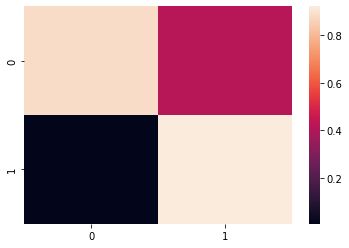

In [ ]:
import numpy as np
import seaborn as sns
uniform_data = np.random.rand(2, 2)
print(uniform_data)
ax = sns.heatmap(uniform_data)

year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
Jan     112   115   145   171   196   204   242   284   315   340   360   417
Feb     118   126   150   180   196   188   233   277   301   318   342   391
Mar     132   141   178   193   236   235   267   317   356   362   406   419
Apr     129   135   163   181   235   227   269   313   348   348   396   461
May     121   125   172   183   229   234   270   318   355   363   420   472
Jun     135   149   178   218   243   264   315   374   422   435   472   535
Jul     148   170   199   230   264   302   364   413   465   491   548   622
Aug     148   170   199   242   272   293   347   405   467   505   559   606
Sep     136   158   184   209   237   259   312   355   404   404   463   508
Oct     119   133   162   191   211   229   274   306   347   359   407   461
Nov     104   114   146   172   180   203   237   271   305   31

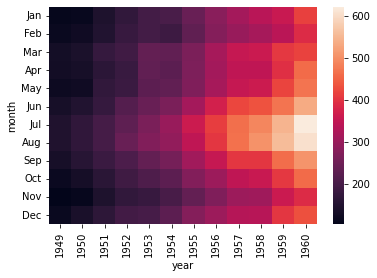

In [ ]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
print(flights)
ax = sns.heatmap(flights)

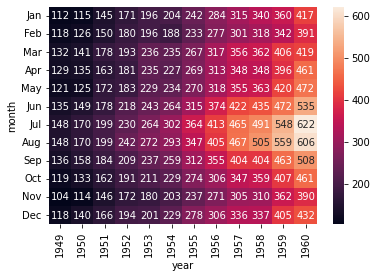

In [ ]:
ax = sns.heatmap(flights, annot=True, fmt="d")

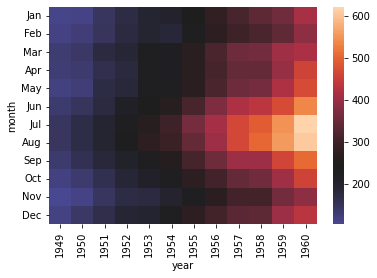

In [ ]:
ax = sns.heatmap(flights, center=flights.loc["Jan", 1955])

In [ ]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('LRmodel').getOrCreate()
df = spark.read.csv( 'cruise_ship_info.csv',inferSchema = True ,header = True )
df.show( 10 )

+-----------+-----------+---+------------------+----------+------+------+-----------------+----+
|  Ship_name|Cruise_line|Age|           Tonnage|passengers|length|cabins|passenger_density|crew|
+-----------+-----------+---+------------------+----------+------+------+-----------------+----+
|    Journey|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|
|      Quest|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|
|Celebration|   Carnival| 26|            47.262|     14.86|  7.22|  7.43|             31.8| 6.7|
|   Conquest|   Carnival| 11|             110.0|     29.74|  9.53| 14.88|            36.99|19.1|
|    Destiny|   Carnival| 17|           101.353|     26.42|  8.92| 13.21|            38.36|10.0|
|    Ecstasy|   Carnival| 22|            70.367|     20.52|  8.55|  10.2|            34.29| 9.2|
|    Elation|   Carnival| 15|            70.367|     20.52|  8.55|  10.2|            34.29| 9.2|
|    Fantasy|   Carnival| 23| 

In [ ]:
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol = 'Cruise_line' ,outputCol = 'cruise_cat' )
indexed = indexer.fit(df).transform(df)
indexed.show(5)

+-----------+-----------+---+------------------+----------+------+------+-----------------+----+----------+
|  Ship_name|Cruise_line|Age|           Tonnage|passengers|length|cabins|passenger_density|crew|cruise_cat|
+-----------+-----------+---+------------------+----------+------+------+-----------------+----+----------+
|    Journey|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|      16.0|
|      Quest|    Azamara|  6|30.276999999999997|      6.94|  5.94|  3.55|            42.64|3.55|      16.0|
|Celebration|   Carnival| 26|            47.262|     14.86|  7.22|  7.43|             31.8| 6.7|       1.0|
|   Conquest|   Carnival| 11|             110.0|     29.74|  9.53| 14.88|            36.99|19.1|       1.0|
|    Destiny|   Carnival| 17|           101.353|     26.42|  8.92| 13.21|            38.36|10.0|       1.0|
+-----------+-----------+---+------------------+----------+------+------+-----------------+----+----------+
only showing top 5 rows



In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
#creating vectors from features
#Apache MLlib takes input if vector form
assembler = VectorAssembler(inputCols = [ 'Age' ,
'cruise_cat' ],outputCol = 'features' )
output = assembler.transform(indexed)
output.select( 'features' , 'crew' ).show( 5 )

+----------+----+
|  features|crew|
+----------+----+
|[6.0,16.0]|3.55|
|[6.0,16.0]|3.55|
|[26.0,1.0]| 6.7|
|[11.0,1.0]|19.1|
|[17.0,1.0]|10.0|
+----------+----+
only showing top 5 rows

